<h1 style="color:SteelBlue; font-size:200%; line-height:1.5">Прогноз эффективности восстановления золота из золотосодержащей руды</h1>

Задача: подготовить прототип модели машинного обучения. Модель должна прогнозировать коэффициент восстановления золота из золотосодержащей руды

Цель: оптимизировать производство и исключить убытки золотодобывающего предприятия

Для работы предоставлены данные с параметрами добычи и очистки. Данные не обработаны: их просто выгрузили из базы.

<h2 style="color:DodgerBlue">Введение</h2>

Схемы и режимы обогащения золотоносных руд существенно зависят от их минерального состава, разрушенности, наличия или отсутствия примесей, которые осложняют извлечение золота, а также от размеров частичек золота. Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на обогащение и очистку.

На производстве, для которого нужно подготовить модель, применяют флотационный процесс обогащения золота. Технологический процесс представлен флотацией и двухэтапной очисткой.

- **Флотация** — технологический процесс разделения мелких твёрдых частиц в водной среде.

    [Основа процесса флотации](http://www.mpoltd.ru/poleznoe/354-flotatsiya-pri-obogashchenii-zolota.html) - способность твердых частиц к избирательной концентрации (адсорбции) на границах раздела фаз. Плохо смачиваемые водой (гидрофобные) частицы избирательно закрепляются на границе раздела фаз и отделяются от хорошо смачиваемых водой (гидрофильных) частиц. На результаты флотации влияет много факторов. В их числе: присутствие первичных илов, извести, сернистого натрия и цианистой соли, крупность частиц золота, а так же их форма.
    
    Во флотационную установку подаётся измельчённая смесь золотосодержащей руды. После обогащения получается **черновой концентрат и «отвальные хвосты»**, то есть остатки продукта с низкой концентрацией ценных металлов. На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости). Эффективность флотационного разделения может быть увеличена с помощью специальных реагентов, называемых флотационными.
    
    
- **Двухэтапная очистка**

    Черновой концентрат проходит две стадии очистки. На выходе получается **финальный концентрат и новые отвальные хвосты.**
    
Величина извлечения металла в концентрат (эффективность обогащения) имеет критически важное значение, поскольку она участвует в расчетах валового дохода предприятия. Расчет показывает, что повышение коэффициента извлечения на 0,5% (а это вполне достижимо) при производительности 1 млн т в год, содержаниях золота в руде 15 г/т и цене на металл 380 дол. за унцию дает дополнительно около 1 млн дол. валового дохода. [studme.org](https://studme.org/180855/geografiya/izvlechenie_metallov_obogaschenii)

<h2 style="color:DodgerBlue">Описание данных</h2>

Для работы предоставлены данные с параметрами добычи и очистки. Данные находятся в трёх файлах и индексируются датой и временем получения информации.

Некоторые параметры в тестовой выборке недоступны, потому что замеряются и/или рассчитываются значительно позже. Также в тестовом наборе нет целевых признаков. Объединённый датасет содержит обучающую и тестовую выборки со всеми признаками.

### Технологический процесс

- **Rougher feed** — исходное сырье
- **Rougher additions** (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- **Rougher process**  — флотация
- **Rougher tails** — отвальные хвосты
- **Float banks** — флотационная установка
- **Cleaner process** — очистка
- **Rougher Au** — черновой концентрат золота
- **Final Au** — финальный концентрат золота

### Параметры этапов

- **air amount** — объём воздуха
- **fluid levels** — уровень жидкости
- **feed size** — размер гранул сырья
- **feed rate** — скорость подачи

### Структура признаков

<code>[этап].[тип_параметра].[название_параметра]</code>

Пример: <code>rougher.input.feed_ag</code>

**Доступные значения для блока <code>[этап]</code>:**

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики 

**Доступные значения для блока <code>[тип_параметра]</code>:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

<h2 style="color:DodgerBlue">Метрики</h2>

**Эффективность обогащения:**


$\begin{align} {Recovery} = \frac{C\times(F-T)}{F\times(C-T)}\times100\% \end{align}$

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье до флотации (концентрате до очистки);
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Важен не только финальный продукт, но и черновой концентрат.

**Метрика качества — sMAPE**:


$\begin{align} {sMAPE} = \frac{1}{N} \sum_{i=1}^{N}\frac{|y_i-\hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2}\times100\% \end{align}$

**Нужно спрогнозировать**:

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

**Итоговая метрика:**

$\begin{align} {total\_sMAPE} = 0.25 \times rougher\_sMAPE + 0.75 \times final\_sMAPE \end{align}$

<h2 style="color:DodgerBlue">План действий</h2>

- Разобраться, что из себя представляют данные, какие признаки можно использовать для предсказания, какие на их основании можно досчитать и какие целевые признаки нужны для валидации и тестирования моделей. Наметить, сколько может быть моделей и какие целевые признаки каждая из моделей будет предсказывать


- Проверить адекватность входных данных
    - рассчитать значения признаков, которые можно рассчитать на основании других признаков и сравнить с заданными
    - проверить аномалии в основных признаках


- Очистить данные(аномалии, критические пропуски)


- Согласно тому, как будет предсказываться целевой коэффициент (напрямую, через предсказание составляющих признаков и т.д.), подготовить обучающие и валидационные наборы данных (досчитать признаки, разделить на *X* и *y* и проч.)


- В процессе валидации моделей выбрать лучший способ заполнения пропусков в данных, отсеять незначимые признаки


- По результатам валидации выбрать модели и способ (прямой прогноз, расчёт на базе прогноза составляющих, комбинация) прогноза целевого коэффициента


- Подготовить pipeline для выбранных моделей и протестировать его на тестовом наборе данных.

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.metrics import mean_absolute_error, make_scorer, SCORERS

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor 
import xgboost as xgb

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, TimeSeriesSplit

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None) 

In [2]:
#функция для построения диаграммы пропущенных значений
def nan_estimation_graph(df, autosize=True, figsize=(8,6)):
    
    if df.isna().sum().sum() > 0:
        nan_df = pd.DataFrame()
        nan_df['percent'] = (100*df.isna().sum()/len(df)).sort_values()
        nan_df['count'] = df.isna().sum().sort_values()
        nan_df = nan_df[nan_df['count'] > 0]

        nan_percent_max = nan_df['percent'].max()

        colors = (nan_df['percent']  / nan_percent_max ).tolist()
        colors = [(color, 0.5*(1-color), 0.5*(1-color)) for color in colors] #подготовка градиентной окраски

        if autosize:
            fig_height = int(len(nan_df)*0.2) + 2
            figsize=(8, fig_height)

        plt.figure(figsize=figsize)
        plt.grid(alpha=0.8)
        plt.xticks(range(0,110,2))
        plt.xlim(0, nan_percent_max + 5)
        plt.xlabel('% пропущенных значений')
        plt.ylim(-1, len(nan_df))
        plt.ylabel('признак')

        xpos = nan_df['percent'] + nan_percent_max*0.02

        bbox=dict(boxstyle="round", fc=(1, 1, 1, 0.8))

        for x, y, txt in zip( xpos, nan_df.index, nan_df['count'] ):
            plt.text(x, y, f'{txt} шт.', verticalalignment='center', bbox=bbox)

        plt.hlines(y=nan_df.index, xmin = 0, xmax = nan_df['percent'], alpha=0.7, 
                   linewidth=10, colors=colors)
        plt.title(f'Оценка количества и доли (%) пропусков в данных\nВсего записей: {len(df)}, из них с пропусками:', 
                  size=14)
        plt.tight_layout()
    else:
        print('В наборе данных нет пропущенных значений')

In [3]:
#расчёт эффективности обогащения
def recovery_calc(au_before, au_after, au_tail_after):
    """
    recovery = 100*C*(F-T) / ( F*(C-T) )
    - F — доля золота в сырье до флотации (концентрате до очистки) (rougher.input.feed_au/rougher.output.concentrate_au);
    - C — доля золота в концентрате после флотации/очистки (rougher.output.concentrate_au/final.output.concentrate_au);
    - T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au/final.output.tail_au)
    """

    recovery = 100*au_after*(au_before-au_tail_after) / ( au_before*(au_after-au_tail_after) )
    
    #неадекватные значения заполняю NaN
#     recovery[recovery < 0] = np.nan
#     recovery[recovery > 100] = np.nan
    recovery.replace(to_replace=[np.inf, -np.inf], value=np.nan, inplace=True)
    
    return recovery

In [4]:
#функция проверяет, можно ли заполнить пропуски в recovery рассчитанными значениями
#а также вычисляет MAE между рассчитанными и имеющимися значениями
def output_recovery_check(calculated_output_recovery, df, recovery_type='final'):
    
    feature = f'{recovery_type}.output.recovery'
    print(f'Рассчитанные значения {feature}')
    display(calculated_output_recovery)
    display(calculated_output_recovery.describe())
    
    print( f'Значения {feature} из датасета' )
    display(df[feature])
    display(df[feature].describe())
    
    print( f'Пропусков в рассчитанных значениях {feature}:', 
          calculated_output_recovery.isna().sum() )
    print( f'Пропусков в значениях {feature} из датасета:', 
          df[feature].isna().sum() )
    
    nan_index_given = df[df[feature].isna()].index
    nan_index_calculated = calculated_output_recovery[calculated_output_recovery.isna()].index
    matching_indexes_count = len( set(nan_index_given) & set(nan_index_calculated) )
    
    print( 'Совпадает пропущенных значений:',  matching_indexes_count )
    print( 'Можно заполнить в изначальном датасете:',  len(nan_index_given) - matching_indexes_count)
    
    good_index_given = df[~df[feature].isna()].index
    good_index_calculated = calculated_output_recovery[~calculated_output_recovery.isna()].index
    good_index = list( set(good_index_given) & set(good_index_calculated) )
    mae = mean_absolute_error(df.loc[good_index, feature], calculated_output_recovery[good_index])
    print(f'Средняя абсолютная ошибка (MAE) расчёта {feature}:', mae )

In [5]:
#функция для проверки предположения о равенстве коэффициентов calculation отношению каких-либо 2х признаков
def coeff_calc_test(df, coef_name, numerator, denominator):
    
    good_index_1 = df[~df[coef_name].isna()].index
    good_index_2 = df[~df[numerator].isna()].index
    good_index_3 = df[~df[denominator].isna()].index
    
    #для сравнения значений использую только объекты без NaN
    good_index = list( set(good_index_1) & set(good_index_2) & set(good_index_3) )
    
    calculated_coef = df[numerator][good_index]/df[denominator][good_index]
    
    #для расчёта MAE возникшие при делении на 0 inf и NaN заменяю на 0
    calculated_coef.replace(to_replace=[np.inf, -np.inf], value=np.nan, inplace=True)
    calculated_coef.fillna(0, inplace=True)
    
    mae = mean_absolute_error(df[coef_name][good_index], calculated_coef)
    
    print(f'Проверка, что {coef_name} = {numerator} / {denominator}')
    print(f'MAE рассчитанного значения {coef_name} относительно значения из full dataset:', mae)

In [6]:
#функция для расчёта потерь после обработки данных  
def lost_after_processing_calc(df, df_dict):
    data = [
        [df_dict['train'].shape[0], df[df['dataset'] == 'train'].shape[0]],
        [df_dict['test'].shape[0], df_full[df_full['dataset'] == 'test'].shape[0]]
    ]
    col_names = ['before', 'after']
    ind_names = ['train', 'test']
    lost_df = pd.DataFrame(data=data, columns=col_names, index=ind_names)
    lost_df.loc[:, 'percent_lost'] = 100*(lost_df['before'] - lost_df['after']) / lost_df['before']
    lost_df.loc[:, 'percent_lost'] = lost_df['percent_lost'].round(1)
    return lost_df

In [7]:
#построение гистограмм распределения и боксплотов под ними
#для всех металлов на определённом этапе обогащения (3 колонки и 2 ряда графиков)
def metals_by_stages_histboxplot(df, stage='rougher.input', product = 'feed', title = 'Доли металлов в сырье до флотации'):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,8), sharey='row')
    i=0   
    for met in ['au', 'ag', 'pb']:
        for type_ in ['train', 'test']:
            feature = f'{stage}.{product}_{met}'
            condition = (df.loc[:, 'dataset'] == type_) & (~df[feature].isna())
            axs[0][i].hist(df.loc[condition, feature],
                        label=type_, density=True, alpha=0.5, bins=30)
            axs[0][i].legend()
        axs[0][i].set_title(feature)

        sns.boxplot(ax=axs[1][i], data=df, y=feature, x='dataset',
                    whis=(2.5, 97.5), showmeans=True, 
                    meanprops=meanprops, flierprops=flierprops)
        axs[1][i].set_xlabel('')
        i += 1
    plt.tight_layout(rect=(0,0,0.95,0.95))
    plt.suptitle(title)
    plt.show()

In [8]:
#построение lineplot изменения концентрации всех металлов по ходу процесса в продукте или хвостах
def metals_by_stages_lineplot(df, met_list=['au', 'ag', 'pb'], figsize=(8,5), tail=False):
    
    plt.figure(figsize=figsize)
    
    
    for met in met_list:
        if tail:
            stages_list = [f'rougher.output.tail_{met}', 
                           f'primary_cleaner.output.tail_{met}', 
                           f'secondary_cleaner.output.tail_{met}', 
                           f'final.output.tail_{met}']
            
            x=['rougher', 'primary_cleaner', 
               'secondary_cleaner', 'final']
            
            title_ = 'хвостах'

        else:
            stages_list = [f'rougher.input.feed_{met}', 
                           f'rougher.output.concentrate_{met}', 
                           f'primary_cleaner.output.concentrate_{met}', 
                           f'final.output.concentrate_{met}']
            
            x=['rougher.input', 'rougher.output', 
               'primary_cleaner.output', 'final.output']
            
            title_ = 'продукте'

            
        p = 0.025
        low_err = abs( df[stages_list].quantile(0.5).values - df[stages_list].quantile(p).values )
        up_err = abs( df[stages_list].quantile(0.5).values - df[stages_list].quantile(1-p).values )

        plt.errorbar(x=x, y=df[stages_list].mean().values, yerr=[low_err, up_err],
                     capsize=5, marker='o', label=met)

    plt.legend()
    plt.xticks(rotation=0)
    plt.title(f'Изменение доли металлов в {title_} по этапам процесса\nусы {p:.1%}-{1-p:.1%}')
    plt.tight_layout()
    plt.show()

In [9]:
#построение гистограмм распределения одного металла по всем циклам обогащения
def metal_by_stages_hists(df, met, tail=False, figsize=(8,10), train_test_split_=True):
    
    me_stages = [f'rougher.input.feed_{met}', 
                 f'rougher.output.concentrate_{met}', 
                 f'primary_cleaner.output.concentrate_{met}',
                 f'final.output.concentrate_{met}']
    title_ = 'в продукте'
    if tail:
        me_stages = [f'rougher.output.tail_{met}',
                     f'primary_cleaner.output.tail_{met}', 
                     f'secondary_cleaner.output.tail_{met}',
                     f'final.output.tail_{met}']
        title_ = 'в хвостах'
      
    nrows=1
    if train_test_split_:
        nrows=2
        
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=figsize)
        
    if train_test_split_:
        for ax, ds in zip(axs, ['train', 'test']):
            for stage in me_stages:
                ax.hist( df.loc[(df['dataset']==ds) & (~df[stage].isna()), stage], 
                        bins=50, label = stage, alpha=0.5 ) 
                ax.set_title(f'{ds}: изменение доли {met} в {title_} по этапам процесса', size=14)
                ax.legend()
    else:
        for stage in me_stages:
                axs.hist( df.loc[~df[stage].isna(), stage], 
                        bins=50, label = stage, alpha=0.5 ) 
                axs.set_title(f'Изменение доли {met} в {title_} по этапам процесса', size=14)
                axs.legend()
                
    plt.tight_layout()

In [10]:
#функция построения гистограммы и боксплота признака для трейн-тест друг под другом
def train_test_histboxplot(df, suptitle='Размер гранул сырья на входе основной флотации', 
                           feature='rougher.input.feed_size',
                           bins=50, figsize=(8,10)):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)
    plt.suptitle(suptitle, size=14)

    axs[0].set_title(('плотность распределения'))
    axs[1].set_title(('боксплот, whis = 2.5-97.5%%'))

    for ds in ['train', 'test']:
        axs[0].hist(df.loc[(df['dataset']==ds) & (~df[feature].isna()), feature], 
                     bins=bins, density=True, label=ds, alpha=0.5)
    sns.boxplot(data=df, x=feature, y='dataset', whis=(2.5, 97.5), showmeans=True, 
                meanprops=meanprops, flierprops=flierprops)
    plt.tight_layout(rect=(0,0,0.95,0.95))
    plt.show()

In [11]:
#функция расчёта и добавления дополнительных признаков в test и train
def add_features(df):
    df.loc[:, 'rougher.add_feature.au_pb_coef'] = df['rougher.input.feed_au'] / df['rougher.input.feed_pb']
    df.loc[:, 'rougher.add_feature.au_ag_coef'] = df['rougher.input.feed_au'] / df['rougher.input.feed_ag']
    df.loc[:, 'rougher.add_feature.au_sol_coef'] = df['rougher.input.feed_au'] / df['rougher.input.feed_sol']

In [12]:
#функция расчёта sMAPE
def smape_calc(true, predict):
    true = np.array(true)
    predict = np.array(predict)
    if len(true) == len(predict):
        numerator = abs(true-predict)
        denominator = (abs(true)+abs(predict))/2

        smape = 100*np.mean(numerator/denominator)
        return smape
    else:
        print('ERROR. Array sizes are different')

In [13]:
#sMAPE scorer для кросс-валидации
smape_scorer = make_scorer(smape_calc, greater_is_better=False)

In [14]:
#функция расчёта total sMAPE
def total_smape_calc(rougher_smape, final_smape):
    result = 0.25*rougher_smape + 0.75*final_smape
    return result

In [15]:
#кросс-валидация для моделей, которые предсказывают concentrate_au и tail_au
#с последующим расчётом sMAPE, возвращает список sMAPE
def cross_val_score_calculated_recovery(model_concentrate, model_tail, X, y, stage='rougher', cv=KFold(n_splits=6)):
    smape_list = np.array([])

    for cv_train_index, cv_test_index in cv.split(X):
        #получение индексов по номерам объектов
        train_index = X.index[cv_train_index]
        test_index = X.index[cv_test_index]
        
        #выделение срезов для трейна и валидации
        X_train=X.loc[train_index, :]
        X_val = X.loc[test_index, :]

        y_train = y.loc[train_index, :]
        y_val = y.loc[test_index, :]
        
        #обучения моделей
        model_concentrate.fit(X_train, y_train[f'{stage}.output.concentrate_au'])
        model_tail.fit(X_train, y_train[f'{stage}.output.tail_au'])

        #расчёт recovery по предсказаниям
        predicted_recovery = recovery_calc(X_val['rougher.input.feed_au'], 
                                           model_concentrate.predict(X_val), 
                                           model_tail.predict(X_val))
        
        #расчёт recovery по реальным значениям
        true_recovery = recovery_calc(X_val['rougher.input.feed_au'], 
                                      y_val[f'{stage}.output.concentrate_au'], 
                                      y_val[f'{stage}.output.tail_au'])
        
        #расчёт sMAPE
        smape_list = np.append(smape_list, smape_calc(true_recovery, predicted_recovery))
    return smape_list

In [16]:
#кросс-валидация моделей прямого прогноза recovery и моделей, прогнозирующих concentrate_au и tail_au
#расчёт sMAPE и создание таблицы для удобства анализа результатов
def make_smape_cv_df(pipes_dict, X_train, y_train, stage_list=['rougher', 'final'], cv=KFold(n_splits=6)):
    
    #инициализация словаря для сохранения значений sMAPE
    smape_cv_dict = {}
    
    #кросс-валидация и расчёт sMAPE
    for stage_ in stage_list:

        smape_cv_dict[f'direct.{stage_}.output.recovery_sMAPE'] = \
        abs(cross_val_score(pipes_dict[f'{stage_}.output.recovery'],
                            X_train, y_train[f'{stage_}.output.recovery'], 
                            cv=cv, scoring=smape_scorer) )

        smape_cv_dict[f'calculated.{stage_}.output.recovery_sMAPE'] = \
        cross_val_score_calculated_recovery(pipes_dict[f'{stage_}.output.concentrate_au'],
                                            pipes_dict[f'{stage_}.output.tail_au'], 
                                            X_train, y_train, 
                                            cv=cv, stage=stage_)

        smape_cv_dict[f'dummy.{stage_}.output.recovery_sMAPE'] = \
        cross_val_score_calculated_recovery(DummyRegressor(strategy='median'), 
                                            DummyRegressor(strategy='median'), 
                                            X_train, y_train,
                                            cv=cv, stage=stage_) 


    #если данные и для флотации и для очистки, считаем total_sMAPE
    if len(stage_list) > 1:
        total_smape_cv_dict = {}
        for type_ in ['calculated', 'direct', 'dummy']:
            smape_cv_dict[f'{type_}_total_sMAPE'] = \
            total_smape_calc(smape_cv_dict[f'{type_}.rougher.output.recovery_sMAPE'],
                             smape_cv_dict[f'{type_}.final.output.recovery_sMAPE'])
            
    #создаём DataFrame
    smape_df = pd.DataFrame(data=smape_cv_dict.values(), 
                            index=smape_cv_dict.keys(), 
                            columns = [f'cv{i}' for i in range(1,7)])
    
    smape_df['mean_score'] = smape_df.mean(axis=1)
    return smape_df

In [17]:
#функция выполняет кросс-валидацию пайплайна из моделей заданного типа и поиск параметров по сетке
def make_pipe_gridsearch(features_list, param_grid, preprocessor, model='lasso'):
    best_params_dict = {}
    pipes_dict = {}
    for key in features_list:
        pipes_dict[key] = Pipeline(steps=[ 
            ('preprocessor', preprocessor), 
            ('model', None) 
        ])
        
        if model == 'lasso':
            pipes_dict[key].set_params(model= Lasso())
        elif model == 'rf':
            pipes_dict[key].set_params(model= RandomForestRegressor())
        elif model == 'xgboost':
            pipes_dict[key].set_params(model= xgb.XGBRegressor())
        elif model == 'catboost':
            pipes_dict[key].set_params(model= CatBoostRegressor())
        
        
        grid = GridSearchCV(pipes_dict[key], param_grid=param_grid, scoring=smape_scorer, cv=cross_validator)
        grid.fit(X_train, y_train[key])
        best_params_dict[key] = grid.best_params_
        pipes_dict[key].set_params(**best_params_dict[key])
        print(f'GridSearch for {key} done. {grid.best_params_}')
    return (pipes_dict, best_params_dict)

In [18]:
meanprops = dict(marker='D', markeredgecolor='black', markersize=8, markerfacecolor='white')
flierprops = dict(marker='o', markerfacecolor='white', markersize=8, linestyle='none')

line_kws={'color':'r', 'linewidth': 2}
scatter_kws=dict(s=20, marker='o', edgecolors='white', alpha=0.5)

In [19]:
train_musthave_features_list = ['rougher.input.feed_au', 
                                'rougher.output.concentrate_au', 
                                'rougher.output.tail_au', 
                                'final.output.concentrate_au', 
                                'final.output.tail_au']

test_musthave_features_list = ['final.output.recovery', 
                               'rougher.output.recovery']

<h1 style="color:SteelBlue"> 1. Осмотр данных</h1>

<h2 style="color:DodgerBlue">1.1 Загрузка, общая информация о данных</h2>

In [20]:
link = 'datasets/ML/'
datasets_list = ['gold_recovery_train.csv', 'gold_recovery_test.csv', 'gold_recovery_full.csv']
key_list = ['train', 'test', 'full']
df_dict = {}
for ds_name, key in zip(datasets_list, key_list):
    df_dict[key] = pd.read_csv(link+ds_name, index_col='Unnamed: 0', parse_dates=['date'])

In [21]:
for key in df_dict.keys():
    print(f'{key:-^50}')
    display(df_dict[key].head())
    display(df_dict[key].info())

----------------------train-----------------------


date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

None

-----------------------test-----------------------


date  primary_cleaner.input.sulfate  \
0 2016-09-01 00:59:59                     210.800909   
1 2016-09-01 01:59:59                     215.392455   
2 2016-09-01 02:59:59                     215.259946   
3 2016-09-01 03:59:59                     215.336236   
4 2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  \
0                             1400.102998   
1                             1396.151033   
2                             1398.075709   
3                             1400.129303   
4                             1402.172226   

   primary_cleaner.state.floatbank8_c_level  \
0                               -500.704369   
1                               -499.240168   
2                               -502.151509   
3                               -498.355873   
4                               -500.810606   

   primary_cleaner.state.floatbank8_d_air  \
0                             1399.001695   
1                             1399.508091   
2                             1399.497088   
3                             1401.065165   
4                             1399.480508   

   primary_cleaner.state.floatbank8_d_level  rougher.input.feed_ag  \
0                               -499.485144              13.128569   
1                               -500.416324              13.036280   
2                               -499.715479              13.138412   
3                               -501.038738              12.400507   
4                               -499.374053              11.327427   

   rougher.input.feed_pb  rougher.input.feed_rate  rougher.input.feed_size  \
0               5.636710               489.793655                62.710452   
1               5.526065               490.104534                61.961163   
2               5.426561               489.617969                66.903807   
3               5.114758               476.618130                59.865919   
4               4.767383               488.248117                63.315324   

   rougher.input.feed_sol  rougher.input.feed_au  \
0               42.022440              12.084103   
1               41.187903              11.918977   
2               42.546294              12.091332   
3               41.06019

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

None

-----------------------full-----------------------


date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  \
0              0.895447              16.904297              2.143149   
1              0.927452              16.634514              2.224930   
2              0.953716              16.208849              2.257889   
3              0.883763              16.532835              2.146849   
4              0.792826              16.525686              2.055292   

   primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                     127.092003                         10.128295   
1                     125.629232                         10.296251   
2                     123.819808                         11.316280   
3                     122.270188                         11.322140   
4                     117.988169                         11.913613   

   primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                             7.25                        0.988759   
1                             7.25                        1.002663   
2                             7.25                        0.991265   
3                             7.25                        0.996739   
4                             7.25                        1.009869   

   primary_cleaner.output.concentrate_ag  \
0                               8.547551   
1                               8.558743   
2                               8.603505   
3                               7.221879   
4                               9.089428   

   primary_cleaner.output.concentrate_pb  \
0                              10.389648   
1                              10.497069   
2                              10.354494   
3                               8.496563   
4                               9.986786   

   primary_cleaner.output.concentrate_sol  \
0                               19.529297   
1                               19.369147   
2                               19.167579   
3                               15.978538   
4                               19.199864   

   primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  \
0                              34.174427                       14.936526   
1                              34.118526                       16.250511   
2                              33.969464                       16.491823   
3                              28.260743                       16.024359   
4                              33.044932                       16.480185   

   primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  \
0                        2.534912                         7.476074   
1                        3.049646                         6.733907   
2                        3.124664                         6.471768   
3                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

None

3 набора данных, полный, тестовый и тренировочный. В тестовом признаков меньше, чем в остальных, чуть ниже рассмотрю отличия. По условию полный набор - это тестовый и тренировочный с полным набором признаков. Проверю, действительно ли датасет <code>gold_recovery_full</code> полный, т.е. включает тестовую и тренировочную выборку:

In [22]:
df_dict['full'].shape[0] == df_dict['test'].shape[0] + df_dict['train'].shape[0]

True

Да, по числу объектов всё совпадает.

Проверю, является ли тестовый датасет точной копией части полного датасета. Аналогичную проверку выполню для тренировочного датасета. Так как объекты индексируются по дате, назначу её индексом. Далее вычту друг из друга срезы данных по соответствующим индексам объектов и признакам. Результирующие датасеты должны быть нулевыми.

In [23]:
for key in df_dict.keys():
    df_dict[key].index = df_dict[key]['date']
    df_dict[key].drop(columns=['date'], inplace=True)

In [24]:
(df_dict['full'].loc[df_dict['train'].index, :] - df_dict['train']).sum().sort_values(ascending=False).head(5)

rougher.calculation.sulfate_to_au_concentrate         4.075027e-10
rougher.calculation.floatbank10_sulfate_to_au_feed    2.824785e-11
secondary_cleaner.state.floatbank4_b_level            3.979039e-12
secondary_cleaner.state.floatbank2_a_level            3.524292e-12
primary_cleaner.state.floatbank8_a_level              2.671641e-12
dtype: float64

In [25]:
(df_dict['full'].loc[df_dict['test'].index, df_dict['test'].columns] - df_dict['test']).sum().sort_values(ascending=False).head(5)

primary_cleaner.state.floatbank8_a_level      1.762146e-12
rougher.state.floatbank10_b_level             1.477929e-12
secondary_cleaner.state.floatbank3_b_level    1.421085e-12
rougher.state.floatbank10_e_air               1.364020e-12
secondary_cleaner.state.floatbank5_a_level    1.136868e-12
dtype: float64

Различия между датасетом минимальны, тестовый и датасет и трейн практически идентичны соответствующим срезам датасета full.

<h2 style="color:DodgerBlue">Результаты загрузки данных и изучения общей информации</h2>

Данные представлены 3 датасетами. В полном датасета 87 признаков, в тестовом - 52. Тренировочный набор данных включает 16860 объектов, тестовый - 5856 (деление примерно 74%-26%). Есть пропуски. Есть признаки, описывающие выходные продукты, не относящиеся к задаче прогноза. Необходима предобработка.

Выполнена успешная проверка того, что исходный датасет (full) содержит обучающую и тестовую выборки со всеми признаками. full действительно состоит из test и train с полным перечнем признаков. Можно далее работать с <code>'gold_recovery_full.csv'</code>проверять адекватность данных, обрабатывать пропуски и дубли, а затем из обработанного датасета выделить срезы для train и test.

In [26]:
df_full = df_dict['full'].copy()
df_full['dataset'] = 'train'
df_full.loc[df_dict['test'].index, 'dataset'] = 'test'

<h2 style="color:DodgerBlue; line-height: 1.5">1.2 Анализ отличий предикторов тестового и тренировочного набора данных</h2>

Признаки, на основании которых можно делать прогноз, содержатся в тестовой выборке. Посмотрю, какие признаки в ней отсутствуют относительно полного надора данных.

**В тестовой выборке отсутствуют:**

In [27]:
set(df_dict['test'].columns)^set(df_dict['full'].columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

- <code>final.output, rougher.output, primary_cleaner.output, secondary_cleaner.output</code> - финальные характеристики продукта и характеристики продукта после флотации/первого этапа очистки/второго этапа очистки. Это то, что получается на выходе и на этапе прогноза (работы модели) не может быть известно
- <code>rougher.calculation</code> - расчётные характеристики флотации. Возможно, просто не посчтитаны для тестового датасета, надо проверить, можно ли посчитать эти параметры на базе известных на момент работы модели данных:
    - <code>rougher.calculation.au_pb_ratio = rougher.input.feed_au / rougher.input.feed_pb (?) </code>
    - <code>rougher.calculation.floatbank10_sulfate_to_au_feed = rougher.input.floatbank10_sulfate / rougher.input.feed_au (?)</code>
    - <code>rougher.calculation.floatbank11_sulfate_to_au_feed = rougher.input.floatbank11_sulfate / rougher.input.feed_au (?)</code>
    - <code>rougher.calculation.sulfate_to_au_concentrate</code> - посчитать не получится, т.к. концентрат - выходной параметр, к тому же непонятно, что за сульфат имеется ввиду

**В тестовой выборке присутствуют:**

In [28]:
df_dict['test'].columns.tolist()

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

Проверю, какие из расчётных характеристик, представленных в полном наборе, можно рассчитать на основании признаков тестового набора

In [29]:
coeff_calc_test(df_full, 
                'rougher.calculation.au_pb_ratio', 
                'rougher.input.feed_au', 
                'rougher.input.feed_pb')

Проверка, что rougher.calculation.au_pb_ratio = rougher.input.feed_au / rougher.input.feed_pb
MAE рассчитанного значения rougher.calculation.au_pb_ratio относительно значения из full dataset: 3.5794527559919694e-16


In [30]:
coeff_calc_test(df_full, 
                'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                'rougher.input.floatbank10_sulfate', 
                'rougher.input.feed_au')

Проверка, что rougher.calculation.floatbank10_sulfate_to_au_feed = rougher.input.floatbank10_sulfate / rougher.input.feed_au
MAE рассчитанного значения rougher.calculation.floatbank10_sulfate_to_au_feed относительно значения из full dataset: 4452.11008752719


In [31]:
coeff_calc_test(df_full, 
                'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                'rougher.input.floatbank11_sulfate', 
                'rougher.input.feed_au')

Проверка, что rougher.calculation.floatbank11_sulfate_to_au_feed = rougher.input.floatbank11_sulfate / rougher.input.feed_au
MAE рассчитанного значения rougher.calculation.floatbank11_sulfate_to_au_feed относительно значения из full dataset: 4192.147219717501


Предположение сработало только для <code>rougher.calculation.au_pb_ratio</code>. Этот коэффициент можно досчитать. Остальные коэффициенты непонятно, как посчитать. Возможно, они рассчитываются уже после процесса или с использованием каких-то дополнительных данных. Без дополнительной информации можно только гадать. Поскольку в тестовом датасете этих коэффициентов нет и непонятно, как они считаются (т.е. с их помощью даже не удастся восстановить пропуски), сразу удалю их из датасета. 

In [32]:
features_to_del_list = ['rougher.calculation.floatbank10_sulfate_to_au_feed', 
                        'rougher.calculation.floatbank11_sulfate_to_au_feed',
                        'rougher.calculation.sulfate_to_au_concentrate']
df_full.drop(columns=features_to_del_list, inplace=True)

<h2 style="color:DodgerBlue">Отличия предикторов тестового и тренировочного набора данных:</h2>

В тестовой выборке отсутствуют финальные характеристики продукта и характеристики продукта после флотации/первого этапа очистки/второго этапа очистки. Это то, что получается на выходе и на этапе прогноза (работы модели) не может быть известно. Также отсутствуют расчётные коэффициенты. Из отсутствующих расчётных коэффициентов можно рассчитать<code>rougher.calculation.au_pb_ratio = rougher.input.feed_au / rougher.input.feed_pb</code>

<h2 style="color:DodgerBlue; line-height: 1.5">1.3 Возможные подходы к прогнозу эффективности обогащения золота. Гипотезы и описание признаков</h2>

### Описание признаков

- Продукты на входе этапа основной флотации:
    - <code>rougher.input.feed_au/ag/pb/sol</code> - доля золота/серебра/свинца/золей в сырье
    - <code>rougher.input.feed_rate/size</code> - скорость подачи/размер гранул сырья
    - <code>rougher.input.floatbank10/11_sulfate/xanthate</code> - доля или количество ксантогената (активатор флотации) и сульфата (сульфид натрия) во флотационных машинах 10 и 11
    

- Параметры, характеризующие этап основной флотации:
    - <code>rougher.state.floatbank10_a/b/c/d/e/f_air/level</code> - объём воздуха и уровень жидкости во флотационной машине 10 (но нет данных о флотационной машине 11)
    

- Продукты на входе этапа первичной очистки:
    - <code>primary_cleaner.input.sulfate/xanthate/depressant</code> - доля или количество (?) ксантогената (активатор флотации) сульфата (сульфид натрия) и депрессанта (силиката натрия)
    - <code>primary_cleaner.input.feed_size</code> - размер гранул сырья


- Параметры, характеризующие этап первичной очистки:
    - <code>rougher.state.floatbank8_a/b/c/d/e/f_air/level</code> - объём воздуха и уровень жидкости во флотационной машине 8 (разные датчики? нужно проверить, отличаются ли показатели)
    

- Параметры, характеризующие этап вторичной очистки:
    - <code>secondary_cleaner.state.floatbank2/3/4/5_a/b_air/level, floatbank6_a_air/level</code> - объём воздуха и уровень жидкости во флотационных машинах 2-5
   

Все признаки теоретически [оказывают влияние на результаты флотации и очистки](https://ru.wikipedia.org/wiki/%D0%A4%D0%BB%D0%BE%D1%82%D0%B0%D1%86%D0%B8%D1%8F). Очевидно влияние доли золота в сырье, но не менее важны и размер гранул, количество флотационных реагентов и параметры этапов. Т.о. можно предположить значительный вклад всех признаков в итоговую величину извлечения золота (эффективность обогащения). 

Отношение доли золота к доле свинца и серебра в продукте перед флотацией также может быть важным признаком, который нужно досчитать. Так как разделение этих металлов, возможно, сопряжено с определёнными трудностями. Возможно, имеет смысл досчитать отношения долей флотационных реагентов к доли золота в сырье.

Интересно, что данных о количестве продукта, идущего на вход оборудования вторичной очистки, нет, но параметры измеряются для нескольких флотационных машин. А данных о параметрах флотационной машины 11 нет, хотя на её вход подаются флотационные реагенты.

**Очень не хватает подробной схемы процесса для понимания логики и построения адекватных процессу моделей.** Вопросы, которые я задал бы лидеру команды или заказчику:

- в чём измеряются признаки? Доля вещества в сырье - это в граммах на тонну? В чём измеряются признаки "воздух", "уровень жидкости"? В каких единицах измеряется размер частиц? Похоже, в микрометрах, судя по интернет-данным. Без этого непонятно, что с чем можно сравнивать и какие коэффициенты дополнительно посчитать.
- что у нас за тип руды? от этого зависит влияние флотационных агентов на результат, можно что-то предположить
- что за тип флотации? (похоже, пенная флотация)
- в процессе основной флотации сырьё подаётся сначала в машину 10, а затем в машину 11 или же параллельно в обе машины? (полагаю, что просто параллельно в обе машины, но не уверен. Тогда при моделировании можно доли флотационных агентов машины 11 (на которую нет данных) считать аналогичными машине 10)
- аналогичный вопрос по этапу вторичной очистки: машины 2-6 работают параллельно или последовательно?
- что означают индексы a, b, с и т.д. в параметрах? Например, если это одни и те же параметры, измеренные разными датчиками, то их можно усреднить, чтобы не путать модель одним и тем же измерением. Если это не так, то усреднение может быть ошибкой.
- что происходит с "хвостами"? Они просто "сливаются" в общее "хвостохранилище", или каждый "хвост" проходит отдельную дополнительную обработку? Это важно для построения модели прогноза концентрации целевого металла в хвосте.
- путь пульпы однонаправленный, или она после очистки может возвращаться во флотацию? Это важно, т.к. если он однонаправленный, то параметры процесса очистки никак не могут влиять на процесс основной флотации. Если же пульпа после очистки может подаваться обратно в основную флотацию, то влияние может иметь место.

**Схема процесса обогащения согласно нашим признакам.**
- Знаками вопроса и пунктирными линиями отмечены нераскрытые в описании моменты.
- Зелёный фон - признаки из тестового набора данных
- Оранжевый фон - признаки, которых в тестовом наборе нет (выходные признаки)
- Красная рамка - среди признаков группы есть те, по которым рассчитывается <code>recovery</code>

<img src="https://lh3.googleusercontent.com/pw/ACtC-3c8p3DKtIo1OB6W50OeOH3IiTwIGl_MxG5c8HS3f0SL6ZhOYl9ARbgIbDfZIhIefJfiJs82hKhSeA8PW9SlayOuOnX9rg5eyhuUy2YrQUZsZ7waJ5Qp0x8E5Iljw_JHADU790C4ADcE6IfX4_lUB_AJ=w800-h884-no">

### Подходы к прогнозу эффективности обогащения

Можно рассмотреть моделирование каждого этапа очистки отдельно. Модели каждого этапа зависят от результатов моделирования предыдущих этапов и параметров. Здесь возникает проблема, т.к. до конца непонятно, как устроен процесс. Например, как рассчитать финальный хвост на основании информации о полученных 3 хвостах. Он не является ни суммой, ни средним арифметическим. Вероятно, хвосты в процессе проходят какие-то стадии обработки или подаются обратно во флотацию. Без этих сведений построение моделей превращается в попытку угадать особенности процесса, что не очень хорошо. К тому же на каждом этапе накапливается ошибка прогноза. Так что это подход применять не буду.


Поскольку непонятна до конца технология процесса (указанные выше моменты), попробую рассмотреть 2 подхода к прогнозированию. Первый технически самый простой: 2 модели, прогнозирующие, соответственно, <code>final.output.recovery и rougher.output.recovery</code>. Другой заключается в прогнозе составляющих и последующем расчёте <code>final.output.recovery и rougher.output.recovery</code> (понадобится показатель <code>rougher.input.feed_au</code>)

- **Подход 1:** прогноз <code>final.output.recovery и rougher.output.recovery</code>: 
    - модель 1 для <code>rougher.output.recovery</code> 
    - модель 2 для <code>final.output.recovery</code>


- **Подход 2:** прогноз составляющих и последующий расчёт <code>final.output.recovery и rougher.output.recovery</code> без разделения этапов.  Всего 4 модели: 
    - модель 1 для <code>rougher.output.concentrate_au</code> 
    - модель 2 для <code>rougher.output.tail_au</code>
    - модель 3 для <code>final.output.concentrate_au</code>
    - модель 4 для <code>final.output.tail_au</code>
    

Есть также варианты работы с признаками: 


Вариант 1: Каждая модель получает на вход все доступные признаки. Отбор признаков осуществляется внутри модели. Например, с помощью регуляризации.


Вариант 2: Модели получают на вход только признаки, соответствующие своему этапу. Тогда модели для <code>rougher</code> получают на вход только признаки <code>rougher.input и rougher.state</code>. Модели для <code>final</code> могут получать либо результаты работы моделей <code>rougher</code> и признаки этапов первичной и вторичной очистки, либо все признаки сразу. На мой взгляд, использовать результаты моделей <code>rougher</code> не очень хорошо, т.к. будет накапливаться ошибка. Кроме того, до конца не ясно, как устроен весь процесс, могут быть скрытые связи и зависимости.

Исходя из этого, предпочтительным кажется вариант 1.

Для обучения, валидации и тестирования модели не подходят объекты, в которых отсутствует целевой признак. Поэтому можно такие объекты сразу удалять из датасетов обучения.

Валидацию каждой модели нужно выполнить по её целевому признаку отдельно (иначе получается задача с несколькими неизвестными: не будет понимания, какая из моделей работает хорошо, а какая - плохо), а валидацию общего результата - по рассчитанным метрикам total_sMAPE. Нужно подготовить тренировочный датасет, в котором для каждого объекта известны признаки <code>['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'final.output.concentrate_au', 'final.output.tail_au']</code>. Затем обучить на нём модели, выполнить настройку параметров и валидацию, а затем выбрать оптимальный подход к прогнзированию (1 или 2).

В тестовом датасете должны присутствовать признаки <code>['final.output.recovery', 'rougher.output.recovery']</code> (в явном виде, либо должна быть возможность их рассчитать). Какие-то из остальных могут отсутствовать, их нужно заполнить методом, выбранным на этапе валидации.

### Примерный план дальнейших действий

- очистить данные от дублей


- удалить пропущенные значения:
    - удалить из тренировочного и тестового набора данных объекты, у которых отсутствует хотя бы один из признаков <code>['final.output.recovery', 'rougher.output.recovery']</code> и нет возможности его рассчитать
    - при необходимости удалить из тренировочного набора данных объекты, у которых отсутствует хотя бы один из признаков <code>['rougher.input.feed_au', 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'final.output.tail_au']</code> и нет возможности его рассчитать (если такие там останутся)


- проверить данные на адекватность
    - соответствие заданных <code>final.output.recovery и rougher.output.recovery</code> рассчитанным по <code>'rougher.input.feed_au', 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au'</code> 
    - наличие аномалий


- удалить из тренировочного набора данных аномалии (при наличии)


- провести исследовательский анализ, поискать связи и зависимости


- подготовить X_train, X_test, y_train, y_test. В X включить **только признаки из test dataset.**


- для каждой модели из предложенных выше вариантов:
    - из X_train взять только необходимые признаки
    - заполнить пропуски в X_train (вероятно, подойдёт один и тот же метод)
    - досчитать новые признаки, если нужно. 
    - выполнить кросс валидацию моделей, подобрать гиперпараметры


- выбрать вариант прогноза (1 или 2)


- подготовить финальный pipeline и протестировать финальную модель

<h1 style="color:SteelBlue"> 2. Предобработка данных</h1>

<h2 style="color:DodgerBlue">2.1 Обработка дублей</h2>

In [33]:
display(df_full[df_full.duplicated()].head(5))
display(df_full[df_full.duplicated()].shape)

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-03-09 15:00:00                          NaN                          NaN   
2016-03-09 16:00:00                          NaN                          NaN   
2016-12-25 18:59:59                          NaN                          NaN   
2016-12-25 19:59:59                          NaN                          NaN   
2016-12-25 22:59:59                          NaN                          NaN   

                     final.output.concentrate_sol  \
date                                                
2016-03-09 15:00:00                           NaN   
2016-03-09 16:00:00                           NaN   
2016-12-25 18:59:59                           NaN   
2016-12-25 19:59:59                           NaN   
2016-12-25 22:59:59                           NaN   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-03-09 15:00:00                          NaN                    NaN   
2016-03-09 16:00:00                          NaN                    NaN   
2016-12-25 18:59:59                          NaN                    NaN   
2016-12-25 19:59:59                          NaN                    NaN   
2016-12-25 22:59:59                          NaN                    NaN   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-03-09 15:00:00                   NaN                   NaN   
2016-03-09 16:00:00                   NaN                   NaN   
2016-12-25 18:59:59                   NaN                   NaN   
2016-12-25 19:59:59                   NaN                   NaN   
2016-12-25 22:59:59                   NaN                   NaN   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-03-09 15:00:00                    NaN                   NaN   
2016-03-09 16:00:00                    NaN                   NaN   
2016-12-25 18:59:59                    NaN                   NaN   
2016-12-25 19:59:59                    NaN                   NaN   
2016-12-25 22:59:59                    NaN                   NaN   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-03-09 15:00:00                            NaN   
2016-03-09 16:00:00                            NaN   
2016-12-25 18:59:59                            NaN   
2016-12-25 19:59:59                            NaN   
2016-12-25 22:59:59                            NaN   

                     primary_cleaner.input.depressant  \
date                                                    
2016-03-09 15:00:00                               NaN   
2016-03-09 16:00:00                               NaN   
2016-12-25 18:59:59                               NaN   
2016-12-25 19:59:59                               NaN   
2016-12-25 22:59:59                               NaN   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-03-09 15:00:00                             7.79   
2016-03-09 16:00:00                             7.79   
2016-12-25 18:59:59                             7.41   
2016-12-25 19:59:59                             7.41   
2016-12-25 22:59:59                             7.51   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-03-09 15:00:00                             NaN   
2016-03-09 16:00:00                             NaN   
2016-12-25 18:59:59                             NaN   
2016-12-25 19:59:59                             NaN   
2016-12-25 22:59:59                             NaN   

                     primary_cleaner.output.concen

(22, 84)

22 объекта с пропусками, нулевыми значениями и т.д., в том числе - в целевых признаках. Полное дублирование за исключением даты-времени. Удалю эти сомнительные объекты.

In [34]:
print( 'Полных дублей:', df_full.duplicated().sum() )
df_full.drop_duplicates(inplace=True)
print( 'Удаление дублей. Полных дублей:', df_full.duplicated().sum() )

Полных дублей: 22
Удаление дублей. Полных дублей: 0


In [35]:
print('Дублей индексов:', df_full.index.duplicated().sum())

Дублей индексов: 0


<h2 style="color:DodgerBlue; line-height:1.5">2.2 Очистка данных: предобработка пропусков, оценка корректности, удаление аномалий</h2>

<h3 style="color:DodgerBlue">2.2.1 Оценка количества пропущенных значений</h3>

Посмотрим на пропуски в полном датасете

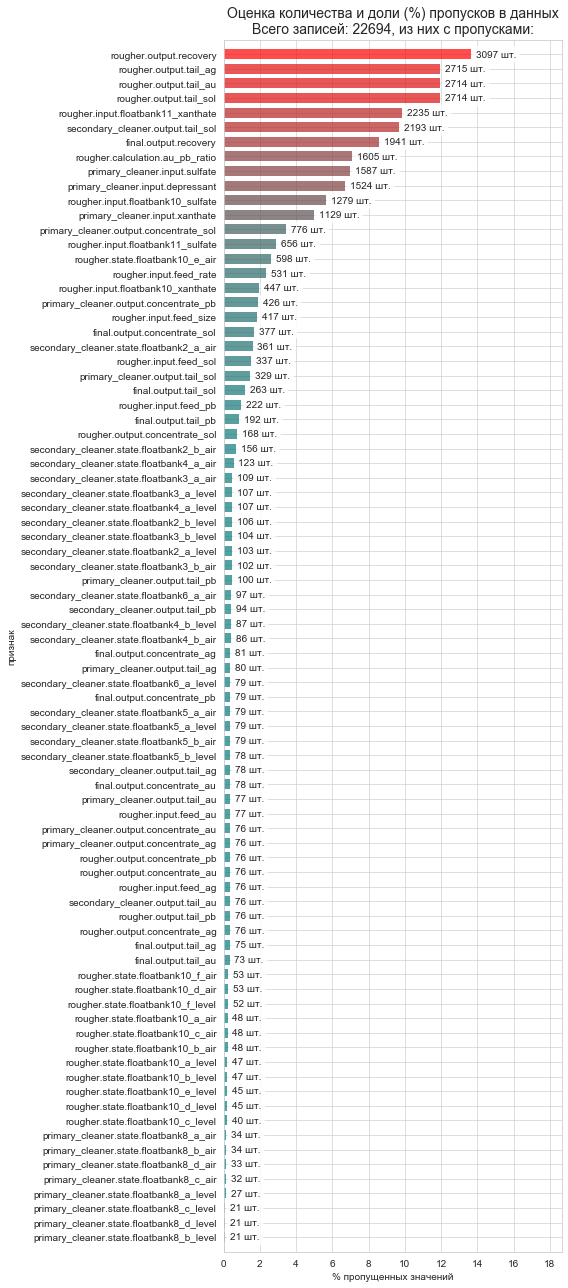

In [36]:
nan_estimation_graph(df_full)

Пропуски есть во многих признаках. Особенно критическими являются пропуски в признаках <code>['final.output.recovery', 'rougher.output.recovery', 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'final.output.concentrate_au', 'final.output.tail_au']</code>

In [37]:
train_musthave_features_list+test_musthave_features_list

['rougher.input.feed_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'final.output.concentrate_au',
 'final.output.tail_au',
 'final.output.recovery',
 'rougher.output.recovery']

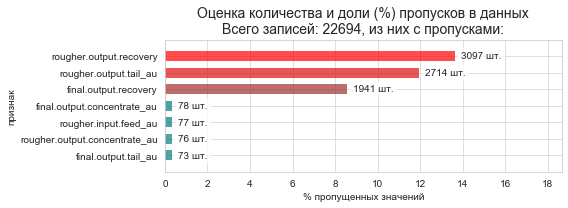

In [38]:
nan_estimation_graph(df_full[train_musthave_features_list+test_musthave_features_list])

<h3 style="color:DodgerBlue">2.2.2 Соответствие исходных и рассчитанных признаков</h3>

В полном датасете есть все признаки, необходимые для расчёта <code>recovery</code>. Проверю адекватность данных: совпадает ли расчётное значение с имеющимся в датасете и нельзя ли заполнить NaN расчётными значениями.

### final.output.recovery

In [39]:
final_output_recovery = recovery_calc(df_full['rougher.input.feed_au'],
                                      df_full['final.output.concentrate_au'], 
                                      df_full['final.output.tail_au'])

output_recovery_check(final_output_recovery, df_full, recovery_type='final')

Рассчитанные значения final.output.recovery


date
2016-01-15 00:00:00    70.541216
2016-01-15 01:00:00    69.266198
2016-01-15 02:00:00    68.116445
2016-01-15 03:00:00    68.347543
2016-01-15 04:00:00    66.927016
                         ...    
2018-08-18 06:59:59    73.755150
2018-08-18 07:59:59    69.049291
2018-08-18 08:59:59    67.002189
2018-08-18 09:59:59    65.523246
2018-08-18 10:59:59    70.281454
Length: 22694, dtype: float64

count     20949.000000
mean         45.130653
std        1354.920380
min     -131983.636107
25%          63.119296
50%          68.255315
75%          72.932684
max       83970.639103
dtype: float64

Значения final.output.recovery из датасета


date
2016-01-15 00:00:00    70.541216
2016-01-15 01:00:00    69.266198
2016-01-15 02:00:00    68.116445
2016-01-15 03:00:00    68.347543
2016-01-15 04:00:00    66.927016
                         ...    
2018-08-18 06:59:59    73.755150
2018-08-18 07:59:59    69.049291
2018-08-18 08:59:59    67.002189
2018-08-18 09:59:59    65.523246
2018-08-18 10:59:59    70.281454
Name: final.output.recovery, Length: 22694, dtype: float64

count    20753.000000
mean        67.447488
std         11.616034
min          0.000000
25%         63.282393
50%         68.322258
75%         72.950836
max        100.000000
Name: final.output.recovery, dtype: float64

Пропусков в рассчитанных значениях final.output.recovery: 1745
Пропусков в значениях final.output.recovery из датасета: 1941
Совпадает пропущенных значений: 1745
Можно заполнить в изначальном датасете: 196
Средняя абсолютная ошибка (MAE) расчёта final.output.recovery: 9.859562718401433e-15


Рассчитанными значениями в датасете ничего не заполнить, да и разница по количеству пропусков в расчёте и факте - очень маленькая. Количество пропусков в исходных и расчётных данных практически совпадает. MAE минимальна, скорее всего связана с округлениями чисел. Значения <code>'final.output.recovery'</code> корректны. 

### rougher.output.recovery

In [40]:
rougher_output_recovery = recovery_calc(df_full['rougher.input.feed_au'],
                                      df_full['rougher.output.concentrate_au'], 
                                      df_full['rougher.output.tail_au'])

output_recovery_check(rougher_output_recovery, df_full, recovery_type='rougher')

Рассчитанные значения rougher.output.recovery


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 22694, dtype: float64

count     19892.000000
mean         45.703522
std        2824.559326
min     -366924.161290
25%          80.841864
50%          86.144112
75%          90.046480
max       13802.071756
dtype: float64

Значения rougher.output.recovery из датасета


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 22694, dtype: float64

count    19597.000000
mean        83.078122
std         14.661880
min          0.000000
25%         80.941306
50%         86.144121
75%         89.987561
max        100.000000
Name: rougher.output.recovery, dtype: float64

Пропусков в рассчитанных значениях rougher.output.recovery: 2802
Пропусков в значениях rougher.output.recovery из датасета: 3097
Совпадает пропущенных значений: 2802
Можно заполнить в изначальном датасете: 295
Средняя абсолютная ошибка (MAE) расчёта rougher.output.recovery: 1.1534716982486114e-14


Рассчитанными значениями в датасете ничего не заполнить. Количество пропусков в расчётных и исходных данных совпадает. MAE минимальна, скорее всего связана с округлениями чисел. Значения <code>'rougher.output.recovery'</code> корректны.

<h3 style="color:DodgerBlue">2.2.3 Удаление объектов с критическими пропусками</h3>

Во всём датасете объекты с пропущенными значениями в признаках <code>['final.output.recovery', 'rougher.output.recovery']</code> не подходят для тестирования и валидации. Обучить модели отдельно на 'final.output.recovery' и  'rougher.output.recovery' можно, но для валидации финальной метрики подойдут только объекты с обоими признаками. Метрики, конечно, тоже можно валидировать отдельно. Однако нет уверенности в качестве признаков таких объектов, где отсутствует важный целевой признак. Соответственно, польза от их сохранения в датасетах сомнительна.

In [41]:
index_to_drop = df_full[df_full[test_musthave_features_list].isna().sum(axis=1)>0].index
print('Объекты с пропущенными значениями final.output.recovery или rougher.output.recovery:', len(index_to_drop))
print('Dataset shape до удаления:', df_full.shape)
df_full.drop(index=index_to_drop, inplace=True)
print('Пропуски удалены. \nDataset shape после удаления:', df_full.shape)
index_to_drop = []

Объекты с пропущенными значениями final.output.recovery или rougher.output.recovery: 3255
Dataset shape до удаления: (22694, 84)
Пропуски удалены. 
Dataset shape после удаления: (19439, 84)


Аналогично указанному выше, в обучающем датасете объекты с пропущенными значениями в одном или более признаках <code>['rougher.input.feed_au', 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'final.output.tail_au']</code> не подходят для тестирования и валидации. Если такие остались, их нужно удалить.

In [42]:
index_to_drop = df_full[ (df_full[train_musthave_features_list].isna().sum(axis=1)>0) 
                        & (df_full['dataset'] == 'train') ].index
print('Объекты с пропущенными значениями критических признаков в обучающем наборе данных:', len(index_to_drop))
if len(index_to_drop) == 0:
    print('Критических пропусков нет')
else:
    print('Dataset shape до удаления:', df_full.shape)
    df_full.drop(index=index_to_drop, inplace=True)
    print('Пропуски удалены. \nDataset shape после удаления:', df_full.shape)    
index_to_drop = []

Объекты с пропущенными значениями критических признаков в обучающем наборе данных: 0
Критических пропусков нет


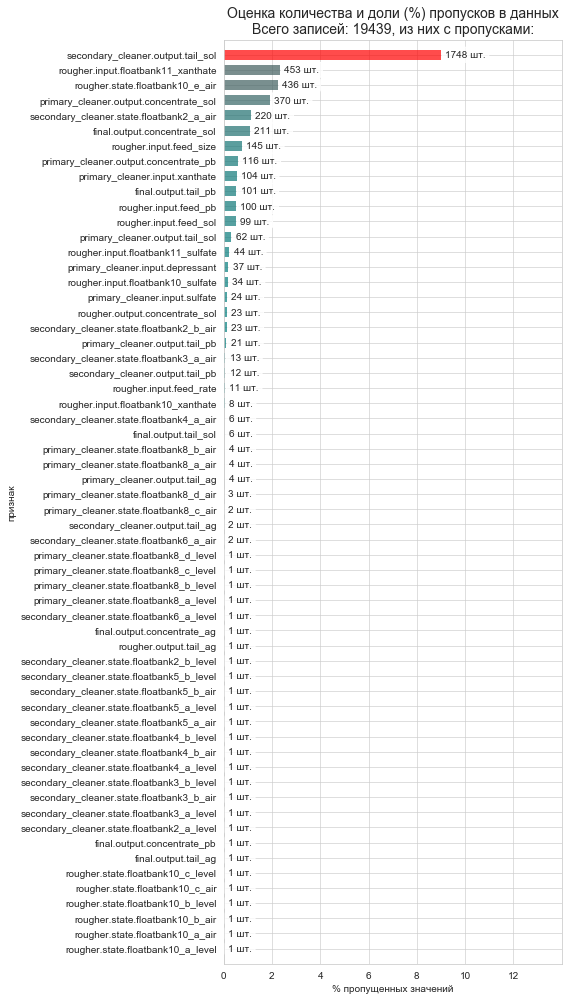

In [43]:
nan_estimation_graph(df_full)

Пропуски, которые остались, не являются критическими. Большая часть пропусков - в доле золя в хвосте после вторичной очистки. Признак, который для построения моделей не нужен.

In [44]:
lost_after_processing_calc(df_full, df_dict)

before  after  percent_lost
train   16860  14149          16.1
test     5856   5290           9.7

В результате удаления объектов с критическими пропусками в значениях признаков train потерял 16.1% объектов, а test - 9.7%

<h3 style="color:DodgerBlue">2.2.4 Поиск аномалий</h3>

Найти аномалии в данных можно, изучив распределение долей металлов на каждом из этапов обогащения. 

Сначала посмотрю гистограммы распределения долей металлов в руде, подающейся на вход флотационной машины.

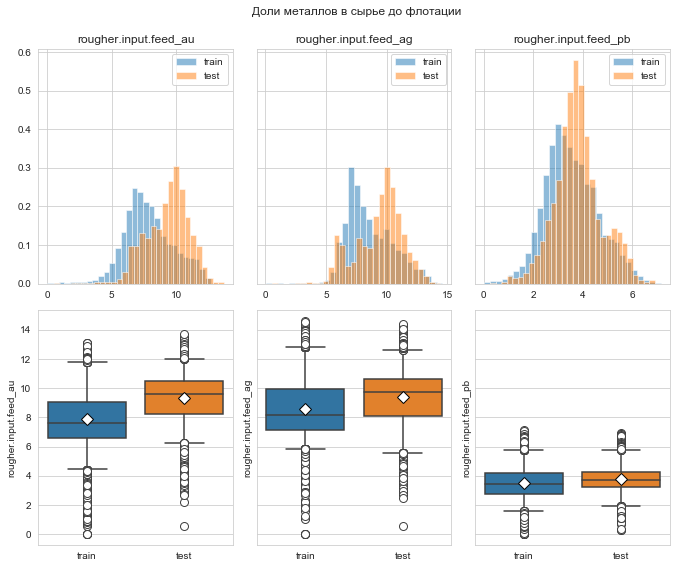

In [45]:
metals_by_stages_histboxplot(df_full, stage='rougher.input', product = 'feed', title = 'Доли металлов в сырье до флотации')

В сырье преобладают примерно в равных долях золото и серебро. Свинца примерно в 2 раза меньше.

Явных выбросов после очистки пропусков в этих данных нет. Есть околонулевые значения, в основном - в тренировочной выборке. Причём, хвост довольно длинный. Надо посмотреть, что это за объекты.

В объектах тестовой выборки наблюдается смещение в сторону больших долей металлов в сырье. Как будто это другая руда. Нужно далее отдельно посмотреть, в какое время бралась тестовая выборка.

In [46]:
print('99% значений доли золота во входном сырье лежат выше отметки', 
      df_full['rougher.input.feed_au'].quantile(0.01).round(2))

99% значений доли золота во входном сырье лежат выше отметки 3.65


При этом в тестовой выборке почти вся доля золота выше 2. Думаю, можно безболезненно убрать объекты, в которых доля золота меньше 2.

In [47]:
df_full[(df_full['rougher.input.feed_au'] < 2) & (df_full['dataset'] == 'train')]

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-03-13 12:00:00                     0.371783                     0.629302   
2016-04-21 00:00:00                     1.040656                     1.866097   
2017-08-13 17:59:59                     0.865318                     3.123931   
2018-03-12 01:59:59                     5.413548                     9.389648   
2018-03-12 02:59:59                     5.413548                     9.389648   
...                                          ...                          ...   
2018-05-24 23:59:59                     5.255790                     7.449669   
2018-05-25 06:59:59                     5.404983                     8.016256   
2018-05-25 07:59:59                     5.288464                     7.474680   
2018-06-05 04:59:59                     5.322163                     9.074574   
2018-08-15 22:59:59                     4.585479                     9.747002   

                     final.output.concentrate_sol  \
date                                                
2016-03-13 12:00:00                      0.253231   
2016-04-21 00:00:00                      2.735971   
2017-08-13 17:59:59                      2.193807   
2018-03-12 01:59:59                      8.731319   
2018-03-12 02:59:59                      8.731319   
...                                           ...   
2018-05-24 23:59:59                      7.287266   
2018-05-25 06:59:59                      7.080704   
2018-05-25 07:59:59                      7.219399   
2018-06-05 04:59:59                      6.365925   
2018-08-15 22:59:59                      7.016775   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-03-13 12:00:00                     3.505267              72.707062   
2016-04-21 00:00:00                     7.148353              59.657700   
2017-08-13 17:59:59                    10.884560             100.000000   
2018-03-12 01:59:59                    45.270618              67.058273   
2018-03-12 02:59:59                    45.270618             100.000000   
...                                          ...                    ...   
2018-05-24 23:59:59                    48.137851              38.055542   
2018-05-25 06:59:59                    46.956869              44.948866   
2018-05-25 07:59:59                    48.012117              25.996403   
2018-06-05 04:59:59                    44.851325              35.105022   
2018-08-15 22:59:59                    46.805538              48.622700   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-03-13 12:00:00              1.309797              0.212103   
2016-04-21 00:00:00              1.088713              0.249844   
2017-08-13 17:59:59              0.000000              0.000000   
2018-03-12 01:59:59              2.279931              0.359739   
2018-03-12 02:59:59              0.000000              0.000000   
...                                   ...                   ...   
2018-05-24 23:59:59              7.834192                   NaN   
2018-05-25 06:59:59              7.643900                   NaN   
2018-05-25 07:59:59              8.025980                   NaN   
2018-06-05 04:59:59              7.504544              0.725917   
2018-08-15 22:59:59              8.597515              0.963328   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-03-13 12:00:00               2.379831              0.403496   
2016-04-21 00:00:00               1.831435              0.456159   
2017-08-13 17:59:59               0.000000              0.000000   
2018-03-12 01:59:59               1.928040              0.533787   
2018-03-12 02:59:59  

In [48]:
df_full['final.output.concentrate_au'].describe()

count    19439.000000
mean        44.076513
std          5.129784
min          0.000000
25%         43.402215
50%         45.011244
75%         46.275313
max         52.756638
Name: final.output.concentrate_au, dtype: float64

К тому же, у некоторых из этих объектов странно высокое значение доли золота в финальном концентрате. Почти на уровне максимума. Странные объекты. Удалю.

In [49]:
index_to_drop = df_full[(df_full['rougher.input.feed_au'] < 2) & (df_full['dataset'] == 'train')].index
df_full.drop(index=index_to_drop, inplace=True)
index_to_drop = []

Теперь посмотрю распределение металлов и золей на разных этапах процесса обогащения.

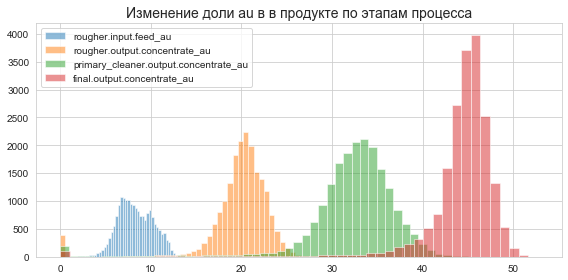

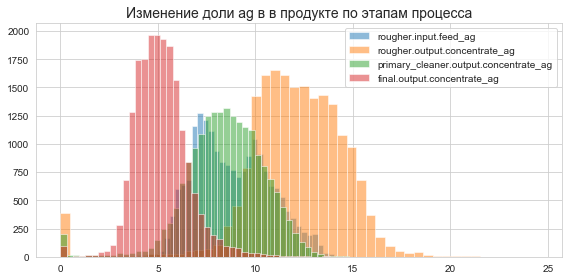

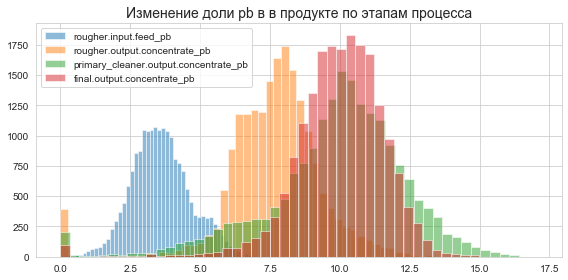

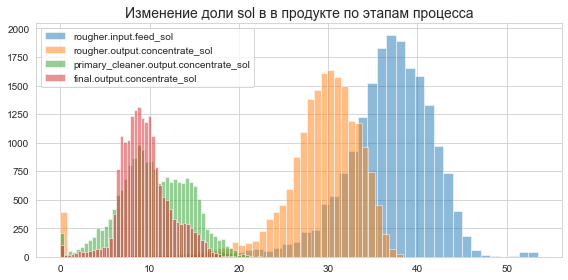

In [50]:
for met in ['au', 'ag', 'pb', 'sol']:
    metal_by_stages_hists(df_full, met, tail=False, train_test_split_=False, figsize=(8,4))

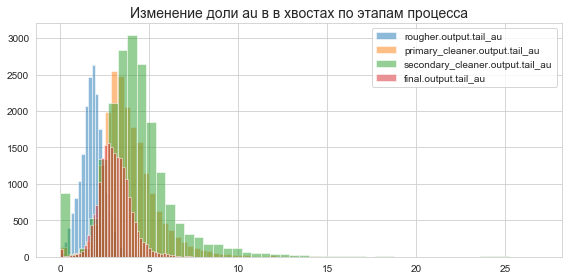

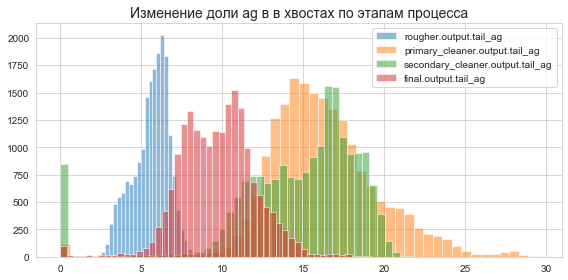

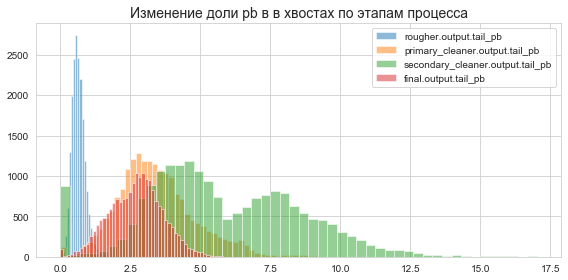

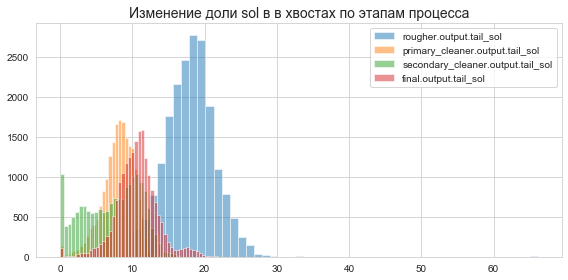

In [51]:
for met in ['au', 'ag', 'pb', 'sol']:
    metal_by_stages_hists(df_full, met, tail=True, train_test_split_=False, figsize=(8,4))

Виден рост доли золота в продукте. Доля других металлов меняется, но в гораздо меньшей степени. В хвостах доля металлов немного растёт, а доля золей падает. Подробнее проанализирую ситуацию после очистки данных.

**В данных на всех этапах есть странные нулевые значения. Посмотрю, что это, для золота:**

In [52]:
output_au_product_list = ['rougher.input.feed_au',
                          'rougher.output.concentrate_au', 
                          'primary_cleaner.output.concentrate_au',
                          'final.output.concentrate_au']

treshold_product = 0.1
for feature in output_au_product_list:
    print(f'{feature} < {treshold_product}')
    display(df_full[df_full[feature] < treshold_product].head(5))

rougher.input.feed_au < 0.1


Empty DataFrame
Columns: [final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.calculation.au_pb_ratio, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol, rougher.output.concentrate_au, rougher.output.recovery, rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_sol, rougher.output.tail_au, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol, secondary_cleaner.output.tail_au, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level, dataset]
Index: []

rougher.output.concentrate_au < 0.1


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-16 21:00:00                     4.566664                    10.406178   
2016-01-16 22:00:00                     4.577832                    10.691605   
2016-01-16 23:00:00                     4.591462                    10.628846   
2016-01-17 00:00:00                     5.296830                    10.597469   
2016-01-17 02:00:00                     8.162896                     8.877528   

                     final.output.concentrate_sol  \
date                                                
2016-01-16 21:00:00                      4.588698   
2016-01-16 22:00:00                      5.274175   
2016-01-16 23:00:00                      5.688961   
2016-01-17 00:00:00                           NaN   
2016-01-17 02:00:00                           NaN   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-16 21:00:00                    46.614456              68.403877   
2016-01-16 22:00:00                    46.250638              70.675633   
2016-01-16 23:00:00                    46.663335              55.088448   
2016-01-17 00:00:00                    44.015642              41.962008   
2016-01-17 02:00:00                    40.715973              49.884856   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-16 21:00:00             10.705777              1.509070   
2016-01-16 22:00:00             10.728531              1.641216   
2016-01-16 23:00:00             10.694584              1.671644   
2016-01-17 00:00:00             11.975654              1.846558   
2016-01-17 02:00:00             10.381465              1.024030   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-16 21:00:00              17.875134              2.509776   
2016-01-16 22:00:00              18.349339              2.540843   
2016-01-16 23:00:00              17.910312              2.686782   
2016-01-17 00:00:00               8.138408              2.889469   
2016-01-17 02:00:00              12.974257              2.739224   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-16 21:00:00                     131.251366   
2016-01-16 22:00:00                     141.184039   
2016-01-16 23:00:00                     126.397495   
2016-01-17 00:00:00                      69.411904   
2016-01-17 02:00:00                     116.517762   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-16 21:00:00                         13.969457   
2016-01-16 22:00:00                         13.978607   
2016-01-16 23:00:00                         12.709727   
2016-01-17 00:00:00                          7.443190   
2016-01-17 02:00:00                         13.259887   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-16 21:00:00                             7.25   
2016-01-16 22:00:00                             7.25   
2016-01-16 23:00:00                             7.25   
2016-01-17 00:00:00                             7.25   
2016-01-17 02:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-16 21:00:00                        1.203034   
2016-01-16 22:00:00                        1.248254   
2016-01-16 23:00:00                        1.229626   
2016-01-17 00:00:00                        0.926251   
2016-01-17 02:00:00                        1.157176   

                     primary_cleaner.output.concen

primary_cleaner.output.concentrate_au < 0.1


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 19:00:00                     5.658943                    10.436002   
2016-01-15 22:00:00                     6.118749                    10.483007   
2016-01-16 06:00:00                     5.322681                     9.577672   
2016-01-18 01:00:00                     4.677499                    11.304745   
2016-01-18 04:00:00                     4.821388                    10.235502   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 19:00:00                      5.942418   
2016-01-15 22:00:00                      6.546983   
2016-01-16 06:00:00                      4.805490   
2016-01-18 01:00:00                      4.655438   
2016-01-18 04:00:00                      1.581066   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 19:00:00                    42.509402              70.348300   
2016-01-15 22:00:00                    41.406172              69.823900   
2016-01-16 06:00:00                    44.059908              69.193840   
2016-01-18 01:00:00                    45.135616              72.437752   
2016-01-18 04:00:00                    43.264258              84.687443   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 19:00:00             10.232392              1.174845   
2016-01-15 22:00:00             10.322077              1.270956   
2016-01-16 06:00:00             10.334312              1.406355   
2016-01-18 01:00:00             10.525415              1.479372   
2016-01-18 04:00:00              5.520487              0.821232   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 19:00:00              19.498566              2.272460   
2016-01-15 22:00:00              19.384247              2.245145   
2016-01-16 06:00:00              19.923319              2.239310   
2016-01-18 01:00:00              19.364956              2.215637   
2016-01-18 04:00:00               9.264695              1.263480   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 19:00:00                     149.998260   
2016-01-15 22:00:00                     158.353434   
2016-01-16 06:00:00                     145.952867   
2016-01-18 01:00:00                     162.832830   
2016-01-18 04:00:00                     161.743280   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 19:00:00                         12.509947   
2016-01-15 22:00:00                         14.020791   
2016-01-16 06:00:00                         13.947704   
2016-01-18 01:00:00                         12.024304   
2016-01-18 04:00:00                         11.978393   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 19:00:00                             7.25   
2016-01-15 22:00:00                             7.25   
2016-01-16 06:00:00                             7.25   
2016-01-18 01:00:00                             7.25   
2016-01-18 04:00:00                             7.25   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 19:00:00                        0.997030   
2016-01-15 22:00:00                        0.997999   
2016-01-16 06:00:00                        0.991678   
2016-01-18 01:00:00                        1.110139   
2016-01-18 04:00:00                        1.097857   

                     primary_cleaner.output.concen

final.output.concentrate_au < 0.1


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-02-13 11:00:00                          0.0                          0.0   
2016-03-11 10:00:00                          0.0                          0.0   
2016-03-11 11:00:00                          0.0                          0.0   
2016-03-11 12:00:00                          0.0                          0.0   
2016-03-11 13:00:00                          0.0                          0.0   

                     final.output.concentrate_sol  \
date                                                
2016-02-13 11:00:00                           0.0   
2016-03-11 10:00:00                           0.0   
2016-03-11 11:00:00                           0.0   
2016-03-11 12:00:00                           0.0   
2016-03-11 13:00:00                           0.0   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-02-13 11:00:00                          0.0                    0.0   
2016-03-11 10:00:00                          0.0                    0.0   
2016-03-11 11:00:00                          0.0                    0.0   
2016-03-11 12:00:00                          0.0                    0.0   
2016-03-11 13:00:00                          0.0                    0.0   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-02-13 11:00:00              8.894029              0.843584   
2016-03-11 10:00:00             10.817313              1.462800   
2016-03-11 11:00:00             10.436792              1.207636   
2016-03-11 12:00:00             10.637073              1.405778   
2016-03-11 13:00:00             10.530320              1.461550   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-02-13 11:00:00              15.417342              1.779052   
2016-03-11 10:00:00              16.407607              2.984504   
2016-03-11 11:00:00              17.800392              2.747294   
2016-03-11 12:00:00              17.195897              2.791440   
2016-03-11 13:00:00              17.556860              2.682127   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-02-13 11:00:00                     133.610147   
2016-03-11 10:00:00                     111.502432   
2016-03-11 11:00:00                     110.586754   
2016-03-11 12:00:00                     104.202288   
2016-03-11 13:00:00                     102.438023   

                     primary_cleaner.input.depressant  \
date                                                    
2016-02-13 11:00:00                         14.032789   
2016-03-11 10:00:00                         11.927825   
2016-03-11 11:00:00                         12.018310   
2016-03-11 12:00:00                         12.009356   
2016-03-11 13:00:00                         12.031551   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-02-13 11:00:00                             7.32   
2016-03-11 10:00:00                             7.79   
2016-03-11 11:00:00                             7.79   
2016-03-11 12:00:00                             7.79   
2016-03-11 13:00:00                             7.79   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-02-13 11:00:00                        1.550190   
2016-03-11 10:00:00                        0.992436   
2016-03-11 11:00:00                        1.000046   
2016-03-11 12:00:00                        1.032094   
2016-03-11 13:00:00                        0.955098   

                     primary_cleaner.output.concen

Странные объекты. На выходе флотационного процесса нули, при этом финальные значения ненулевые. На входе тоже нет нулевых значений. Т.е. нули в концентрации появляются только на промежуточном этапе. Думаю, их нужно удалить, в том числе - из тестового набора данных. И сообщить о наличии таких объектов. Не вижу смысла на ошибочных объектах тестировать модель. Задача состоит в построении адекватной модели.

In [53]:
for feature in output_au_product_list:
    index_to_drop = []
    index_to_drop = df_full[df_full[feature] < treshold_product].index
    df_full.drop(index=index_to_drop, inplace=True)
    print(f'Удалено ошибочных объектов с нулями в {feature}:', len(index_to_drop))
    index_to_drop = []

Удалено ошибочных объектов с нулями в rougher.input.feed_au: 0
Удалено ошибочных объектов с нулями в rougher.output.concentrate_au: 392
Удалено ошибочных объектов с нулями в primary_cleaner.output.concentrate_au: 191
Удалено ошибочных объектов с нулями в final.output.concentrate_au: 94


**Аналогично для хвостов:**

In [54]:
output_au_tail_list = ['rougher.output.tail_au',
                          'primary_cleaner.output.tail_au',
                          'secondary_cleaner.output.tail_au',
                          'final.output.tail_au']

treshold_tail = 0
for feature in output_au_tail_list:
    print(f'{feature} = {treshold_tail}')
    display(df_full[df_full[feature] == treshold_tail].head(5))

rougher.output.tail_au = 0


Empty DataFrame
Columns: [final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, primary_cleaner.state.floatbank8_d_air, primary_cleaner.state.floatbank8_d_level, rougher.calculation.au_pb_ratio, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_rate, rougher.input.feed_size, rougher.input.feed_sol, rougher.input.feed_au, rougher.input.floatbank10_sulfate, rougher.input.floatbank10_xanthate, rougher.input.floatbank11_sulfate, rougher.input.floatbank11_xanthate, rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol, rougher.output.concentrate_au, rougher.output.recovery, rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_sol, rougher.output.tail_au, rougher.state.floatbank10_a_air, rougher.state.floatbank10_a_level, rougher.state.floatbank10_b_air, rougher.state.floatbank10_b_level, rougher.state.floatbank10_c_air, rougher.state.floatbank10_c_level, rougher.state.floatbank10_d_air, rougher.state.floatbank10_d_level, rougher.state.floatbank10_e_air, rougher.state.floatbank10_e_level, rougher.state.floatbank10_f_air, rougher.state.floatbank10_f_level, secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol, secondary_cleaner.output.tail_au, secondary_cleaner.state.floatbank2_a_air, secondary_cleaner.state.floatbank2_a_level, secondary_cleaner.state.floatbank2_b_air, secondary_cleaner.state.floatbank2_b_level, secondary_cleaner.state.floatbank3_a_air, secondary_cleaner.state.floatbank3_a_level, secondary_cleaner.state.floatbank3_b_air, secondary_cleaner.state.floatbank3_b_level, secondary_cleaner.state.floatbank4_a_air, secondary_cleaner.state.floatbank4_a_level, secondary_cleaner.state.floatbank4_b_air, secondary_cleaner.state.floatbank4_b_level, secondary_cleaner.state.floatbank5_a_air, secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_air, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_air, secondary_cleaner.state.floatbank6_a_level, dataset]
Index: []

primary_cleaner.output.tail_au = 0


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-05-25 09:59:59                     4.539454                     8.403190   
2016-05-25 10:59:59                     5.012049                     8.642272   
2016-05-25 11:59:59                     5.767520                     8.777418   
2016-05-25 12:59:59                     6.160867                     8.497407   
2016-05-25 13:59:59                     5.678969                     8.955707   

                     final.output.concentrate_sol  \
date                                                
2016-05-25 09:59:59                      9.078570   
2016-05-25 10:59:59                      9.991968   
2016-05-25 11:59:59                     10.046904   
2016-05-25 12:59:59                     10.141786   
2016-05-25 13:59:59                     10.249527   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-05-25 09:59:59                    46.454830              71.212122   
2016-05-25 10:59:59                    45.173790              87.486661   
2016-05-25 11:59:59                    43.733963              87.064996   
2016-05-25 12:59:59                    43.439561              64.549480   
2016-05-25 13:59:59                    43.984957              62.671220   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-05-25 09:59:59              9.399079              1.708505   
2016-05-25 10:59:59              4.339234              0.826410   
2016-05-25 11:59:59              3.682631              0.777564   
2016-05-25 12:59:59              8.452616              1.910102   
2016-05-25 13:59:59              8.163939              1.965588   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-05-25 09:59:59              11.142506              2.790530   
2016-05-25 10:59:59               4.785511              1.285777   
2016-05-25 11:59:59               4.943043              1.145197   
2016-05-25 12:59:59              12.893241              2.892502   
2016-05-25 13:59:59              13.070145              2.760538   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-05-25 09:59:59                     123.016722   
2016-05-25 10:59:59                     113.128501   
2016-05-25 11:59:59                     110.481253   
2016-05-25 12:59:59                     115.316951   
2016-05-25 13:59:59                     114.739196   

                     primary_cleaner.input.depressant  \
date                                                    
2016-05-25 09:59:59                         14.079339   
2016-05-25 10:59:59                         12.976258   
2016-05-25 11:59:59                         13.939886   
2016-05-25 12:59:59                         14.064240   
2016-05-25 13:59:59                         14.008896   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-05-25 09:59:59                             7.65   
2016-05-25 10:59:59                             7.65   
2016-05-25 11:59:59                             7.65   
2016-05-25 12:59:59                             7.65   
2016-05-25 13:59:59                             8.26   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-05-25 09:59:59                        0.964615   
2016-05-25 10:59:59                        1.002021   
2016-05-25 11:59:59                        1.004524   
2016-05-25 12:59:59                        0.994658   
2016-05-25 13:59:59                        1.003726   

                     primary_cleaner.output.concen

secondary_cleaner.output.tail_au = 0


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-18 05:00:00                     4.392827                    10.611895   
2016-01-21 20:00:00                     6.164771                    11.585627   
2016-03-07 02:00:00                     4.962936                    10.045186   
2016-03-07 03:00:00                     5.090707                    10.294071   
2016-03-07 04:00:00                     5.052135                    10.191343   

                     final.output.concentrate_sol  \
date                                                
2016-01-18 05:00:00                      3.769994   
2016-01-21 20:00:00                     10.228155   
2016-03-07 02:00:00                           NaN   
2016-03-07 03:00:00                           NaN   
2016-03-07 04:00:00                           NaN   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-18 05:00:00                    46.543285             100.000000   
2016-01-21 20:00:00                    42.601096              65.868895   
2016-03-07 02:00:00                    43.131455              60.257491   
2016-03-07 03:00:00                    43.306838              62.060535   
2016-03-07 04:00:00                    43.286956              62.765732   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-18 05:00:00              0.000000              0.000000   
2016-01-21 20:00:00             12.046762              2.444643   
2016-03-07 02:00:00             10.094195              0.870124   
2016-03-07 03:00:00             10.276145              0.906560   
2016-03-07 04:00:00             10.299241              1.010658   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-18 05:00:00               0.000000              0.000000   
2016-01-21 20:00:00              16.478456              3.742128   
2016-03-07 02:00:00              17.675953              1.809535   
2016-03-07 03:00:00              17.638330              1.683344   
2016-03-07 04:00:00              17.787631              1.586535   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-18 05:00:00                     157.532385   
2016-01-21 20:00:00                     207.971102   
2016-03-07 02:00:00                     129.985763   
2016-03-07 03:00:00                     134.980224   
2016-03-07 04:00:00                     134.987057   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-18 05:00:00                         11.963090   
2016-01-21 20:00:00                         17.037952   
2016-03-07 02:00:00                         11.599422   
2016-03-07 03:00:00                         11.503119   
2016-03-07 04:00:00                         11.535203   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-18 05:00:00                             7.25   
2016-01-21 20:00:00                             7.25   
2016-03-07 02:00:00                             8.01   
2016-03-07 03:00:00                             8.01   
2016-03-07 04:00:00                             8.01   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-18 05:00:00                        1.103433   
2016-01-21 20:00:00                        1.188725   
2016-03-07 02:00:00                        2.091129   
2016-03-07 03:00:00                        2.089600   
2016-03-07 04:00:00                        2.105497   

                     primary_cleaner.output.concen

final.output.tail_au = 0


final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-18 05:00:00                     4.392827                    10.611895   
2016-04-20 11:00:00                     5.829191                     7.802456   
2016-04-20 22:00:00                     5.957068                    11.112426   
2016-05-01 01:59:59                     5.774070                    11.079094   
2016-06-30 18:59:59                     6.977900                     6.462480   

                     final.output.concentrate_sol  \
date                                                
2016-01-18 05:00:00                      3.769994   
2016-04-20 11:00:00                     11.447054   
2016-04-20 22:00:00                     16.058054   
2016-05-01 01:59:59                      8.151890   
2016-06-30 18:59:59                     10.321985   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-18 05:00:00                    46.543285                  100.0   
2016-04-20 11:00:00                    25.773495                  100.0   
2016-04-20 22:00:00                    42.984047                  100.0   
2016-05-01 01:59:59                    38.456209                  100.0   
2016-06-30 18:59:59                    42.718150                  100.0   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-18 05:00:00                   0.0                   0.0   
2016-04-20 11:00:00                   0.0                   0.0   
2016-04-20 22:00:00                   0.0                   0.0   
2016-05-01 01:59:59                   0.0                   0.0   
2016-06-30 18:59:59                   0.0                   0.0   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-18 05:00:00                    0.0                   0.0   
2016-04-20 11:00:00                    0.0                   0.0   
2016-04-20 22:00:00                    0.0                   0.0   
2016-05-01 01:59:59                    0.0                   0.0   
2016-06-30 18:59:59                    0.0                   0.0   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-18 05:00:00                     157.532385   
2016-04-20 11:00:00                      63.014436   
2016-04-20 22:00:00                     135.081971   
2016-05-01 01:59:59                       4.494127   
2016-06-30 18:59:59                       0.129139   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-18 05:00:00                         11.963090   
2016-04-20 11:00:00                          4.724183   
2016-04-20 22:00:00                         12.250947   
2016-05-01 01:59:59                          0.537326   
2016-06-30 18:59:59                               NaN   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-18 05:00:00                             7.25   
2016-04-20 11:00:00                             7.30   
2016-04-20 22:00:00                             7.30   
2016-05-01 01:59:59                             8.40   
2016-06-30 18:59:59                             7.31   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-18 05:00:00                        1.103433   
2016-04-20 11:00:00                        0.731953   
2016-04-20 22:00:00                        1.197524   
2016-05-01 01:59:59                             NaN   
2016-06-30 18:59:59                        0.004816   

                     primary_cleaner.output.concen

Тоже странные объекты. Нули во всех хвостах. Вряд ли такое возможно. Возникают сомнения в адекватности прочих признаков у таких объектов. Аналогично нулям в концентрате, удалю их, в том числе - из тестового набора данных.

In [55]:
for feature in output_au_tail_list:
    index_to_drop = []
    index_to_drop = df_full[df_full[feature] == treshold_tail].index
    df_full.drop(index=index_to_drop, inplace=True)
    print(f'Удалено ошибочных объектов с нулями в {feature}:', len(index_to_drop))
    index_to_drop = []

Удалено ошибочных объектов с нулями в rougher.output.tail_au: 0
Удалено ошибочных объектов с нулями в primary_cleaner.output.tail_au: 104
Удалено ошибочных объектов с нулями в secondary_cleaner.output.tail_au: 771
Удалено ошибочных объектов с нулями в final.output.tail_au: 53


In [56]:
lost_after_processing_calc(df_full, df_dict)

before  after  percent_lost
train   16860  12810          24.0
test     5856   4958          15.3

**Проверю размер гранул сырья. Соответствует ли тестовый набор данных тренировочному и как размер распределён.**

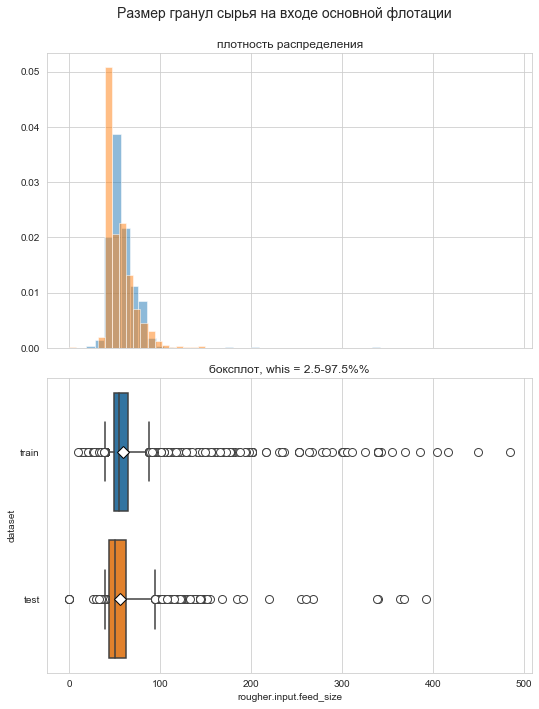

In [57]:
train_test_histboxplot(df_full)

In [58]:
p = .01
upper_size_limit = df_full['rougher.input.feed_size'].quantile(1-p).round(2)
lower_size_limit = df_full['rougher.input.feed_size'].quantile(p).round(2)
print(f'{1-p} quantile:', upper_size_limit.round(2))
print(f'{p} quantile:', lower_size_limit.round(2))

0.99 quantile: 109.58
0.01 quantile: 36.82


In [59]:
df_full[(df_full['rougher.input.feed_size'] >= upper_size_limit) | (df_full['rougher.input.feed_size'] <= lower_size_limit)]

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-28 06:00:00                     7.164662                    11.696373   
2016-02-04 15:00:00                     5.678724                     9.212646   
2016-02-05 07:00:00                     8.679501                     8.477346   
2016-02-05 08:00:00                     7.618563                     8.220776   
2016-02-05 11:00:00                     7.884420                     7.359188   
...                                          ...                          ...   
2018-06-12 07:59:59                     4.426157                    12.352410   
2018-06-24 12:59:59                     4.985559                     8.655421   
2018-06-24 13:59:59                     4.943434                     8.937649   
2018-06-24 14:59:59                     5.023345                     9.217461   
2018-06-24 15:59:59                     4.695987                     8.671405   

                     final.output.concentrate_sol  \
date                                                
2016-01-28 06:00:00                           NaN   
2016-02-04 15:00:00                           NaN   
2016-02-05 07:00:00                      8.947763   
2016-02-05 08:00:00                      8.062044   
2016-02-05 11:00:00                      5.529308   
...                                           ...   
2018-06-12 07:59:59                      6.165343   
2018-06-24 12:59:59                      8.237367   
2018-06-24 13:59:59                      7.939273   
2018-06-24 14:59:59                      7.223655   
2018-06-24 15:59:59                      7.102120   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-28 06:00:00                    39.982056              55.235125   
2016-02-04 15:00:00                    44.693277              60.933161   
2016-02-05 07:00:00                    40.107654              54.347701   
2016-02-05 08:00:00                    42.370477              55.970117   
2016-02-05 11:00:00                    42.891959              47.589520   
...                                          ...                    ...   
2018-06-12 07:59:59                    44.347168              66.934098   
2018-06-24 12:59:59                    45.682869              90.697313   
2018-06-24 13:59:59                    44.664541              99.335435   
2018-06-24 14:59:59                    45.382952              84.236645   
2018-06-24 15:59:59                    46.742987              79.007728   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-28 06:00:00             11.861058              1.342052   
2016-02-04 15:00:00             11.625613              1.564169   
2016-02-05 07:00:00             11.214360              2.093735   
2016-02-05 08:00:00             11.223176              1.971737   
2016-02-05 11:00:00             11.008331              2.345465   
...                                   ...                   ...   
2018-06-12 07:59:59              7.938644              1.765675   
2018-06-24 12:59:59              6.203544              1.487030   
2018-06-24 13:59:59              0.470908              0.107051   
2018-06-24 14:59:59             10.225760              2.347843   
2018-06-24 15:59:59             12.507409              2.840665   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-28 06:00:00               8.297814              2.964615   
2016-02-04 15:00:00              11.069010              2.484603   
2016-02-05 07:00:00              14.595775              3.494521   
2016-02-05 08:00:00              14.266307              3.257067   
2016-02-05 11:00:00  

В данных присутствуют экстремальные значения, но их мало (менее 2%). Судя по индексам, это какие-то бракованные/нехарактерные партии или что-то подобное, т.к. объекты по времени находятся близко друг к другу. На мой взгляд, их лучше удалить, чтобы они "не путали" модель. Обучиться предсказывать такие объекты всё равно на такой выборке не получится. Из теста тоже удалю. Большого влияния на результаты тестирования модели это не окажет, т.к. объектов мало, а при анализе будет мешать. В любом случае, исходный тестовый датасет останется в <code>df_dict['test']</code> и модель можно будет протестировать на нём, убрав объекты с пропусками в целевых признаках. Т.е. сымитировать работу модели и пайплайна на "грязных" входных данных.

In [60]:
index_to_drop = df_full[
    (df_full['rougher.input.feed_size'] >= upper_size_limit) 
    | 
    (df_full['rougher.input.feed_size'] <= lower_size_limit)].index

df_full.drop(index = index_to_drop,
             inplace=True)

**Данные очищены. Посмотрим, какой процент объектов был вынужденно потерян.**

In [61]:
lost_after_processing_calc(df_full, df_dict)

before  after  percent_lost
train   16860  12537          25.6
test     5856   4877          16.7

Немало, но лучше работать с адекватными данными. В любом случае, с чем работать - есть.

<h3 style="color:DodgerBlue">2.2.5 Анлиз времени появления некорректных данных</h3>

In [62]:
bad_data_indexes = list( set(df_dict['full'].index)^set(df_full.index) )
print('Объектов с аномалиями/пропусками в целевых признаках во всём наборе данных:', len(bad_data_indexes))

Объектов с аномалиями/пропусками в целевых признаках во всём наборе данных: 5302


In [63]:
#создание датафрейма с датами и их маркерами bad/good
dates_df = pd.DataFrame(df_dict['full'].index, columns=['date'])
dates_df.loc[:, 'year'] = dates_df['date'].dt.year
dates_df.loc[:, 'month'] = dates_df['date'].dt.month
dates_df.loc[:, 'day'] = dates_df['date'].dt.day
dates_df.loc[:, 'weekday'] = dates_df['date'].dt.weekday
dates_df.loc[:, 'hour'] = dates_df['date'].dt.hour
dates_df.loc[:, 'is_bad'] = 1
dates_df.loc[dates_df['date'].isin(df_full.index), 'is_bad'] = 0
dates_df.index = dates_df['date']
dates_df.drop(columns=['date'], inplace=True)

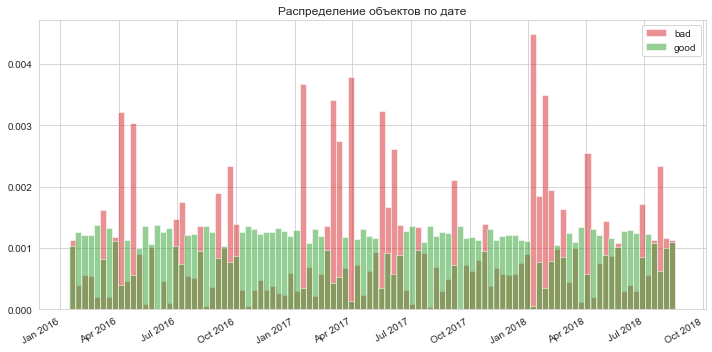

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(dates_df[dates_df['is_bad']==1].index, bins=100, density=True, color=sns.color_palette()[3], alpha=0.5, label='bad')
ax.hist(dates_df[dates_df['is_bad']==0].index, bins=100, density=True, color=sns.color_palette()[2], alpha=0.5, label='good')
ax.legend()
ax.set_title('Распределение объектов по дате')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

В 2016 году представлен неполный январь, а в 2019 году нет данных за октябрь-декабрь. Плохие данные появляются всплесками, причём очень резкими, сильно выбиваясь из общего уровня данных за аналогичные интервалы времени. Похоже на какие-то сбои или ошибки в базе.

Похоже, меньше всего плохих данных приходится на октябрь-декабрь, так было и в 2016 и в 2017. А вот самый сильный всплеск плохих данных - с января по март 2017 и 2018 годов.

<h1 style="color:SteelBlue"> Результаты предобработки данных</h1>

На этапе предобработки удалены 22 дубля - объекты с полностью одинаковыми значениями всех признаков, кроме даты-времени. В данных обнаружены пропуски и аномальные значения. 

Критические пропуски - в основном пропуски в целевых признаках. В результате удаления объектов с критическими пропусками  train потерял *16.1%* объектов, а test - *9.7%*

Обнаружены также аномальные значения: нулевые значения долей металлов в концентрате и на входе флотации, нулевые значения долей металлов в хвостах. При этом прочие значения признаков нулевыми не являлись. Характерна ситуация, когда для объектов с нулями на входе флотации выходная концентрация не была нулевой. Также обнаружены объекты с очень маленькими и очень большими значениями feed_size (лежащие длинными хвостами вне зоны 98% объектов). Они также были удалены.

Плохие данные появляются всплесками, причём очень резкими, сильно выбиваясь из общего уровня данных за аналогичные интервалы времени. Похоже на какие-то сбои или ошибки в базе. Меньше всего плохих данных приходится на октябрь-декабрь 2016 и 2017 годов. Самый сильный всплеск плохих данных - с января по март 2017 и 2018 годов.

Размеры наборов данных до и после очистки и процент вынужденных потерь:

In [65]:
lost_after_processing_calc(df_full, df_dict)

before  after  percent_lost
train   16860  12537          25.6
test     5856   4877          16.7

<h1 style="color:SteelBlue"> 3. Исследовательский анализ</h1>

Признаков очень много. Попробую оценить, от чего зависит доля золота на разных этапах цикла обогащения и от каких параметров зависит доля  золота в хвостах.

Постараюсь разобраться, чего ожидать.

**Флотация**  — процесс разделения мелких твёрдых частиц (главным образом минералов) в водной суспензии (пульпе) или растворе, основанный на избирательной концентрации (адсорбции) частиц на границах раздела фаз в соответствии с их поверхностной активностью или смачиваемостью. Гидрофобные (плохо смачиваемые водой) частицы избирательно закрепляются на границе раздела фаз (обычно газа и воды) и отделяются от гидрофильных (хорошо смачиваемых водой) частиц. [(Горная энциклопедия)](http://www.mining-enc.ru/f/flotaciya/)

**Флотационные реагенты** — химические вещества, добавляемые в пульпу при флотации для регулирования взаимодействия частиц с пузырьками газа, химических реакций и физико-химических процессов в жидкой фазе, на границах раздела фаз и в пенном слое с целью создания условий селективного разделения минералов. В соответствии с функциональным назначением флотационных реагентов различают собиратели (коллекторы), пенообразователи (вспениватели) и регуляторы (модификаторы). 

**Таким образом:**


**В нашем случае, поскольку параметры флотационных машин - это *air amount* (объём воздуха) и *fluid levels* (уровень жидкости), речь идёт о пенной флотации.** В процессе пенной флотации обработанные реагентами частицы выносятся на поверхность воды пузырьками воздуха, образуя пенный слой, устойчивость которого регулируется добавлением пенообразователей. [(Горная энциклопедия)](http://www.mining-enc.ru/f/flotaciya/) 

Соединение камер флотационных машин в определённой последовательности с направлением потоков пенных и камерных продуктов на перефлотацию, доизмельчение, перечистную или контрольную флотации составляет схему флотации, которая позволяет получить концентрат требуемого качества при заданном извлечении полезного компонента. [(Горная энциклопедия)](http://www.mining-enc.ru/f/flotaciya/)

Обычно в пульпу добавляется регулятор (или регуляторы), затем собиратель и впоследствии пенообразователь. Выдерживается оптимальное время контакта пульпы с каждым реагентом. Во многих случаях действие реагентов комплексное. [(Горная энциклопедия)](http://www.mining-enc.ru/f/flotacionnye-reagenty/)

**В нашем случае собирателем является ксантогенат, а регуляторами - сульфид натрия (активатор) и силикат натрия (депрессор)**

Добавление сульфида натрия (активатора) сульфидизирует поверхность оксидных минералов цветных металлов и позволяет закрепиться на них молекулам ксантогената (коллектора). Силикат натрия (депрессор), в свою очередь, затрудняет взаимодействие минерала с собирателем: он гидрофилизирует кварц и другие силикатные минералы и предотвращает их флотацию. К тому же силикат натрия разобщает частицы микронных размеров (тонких шламов), уменьшая их отрицательное действие на флотацию. [(Горная энциклопедия](http://www.mining-enc.ru/f/flotacionnye-reagenty/), [Справочник химика 21)](https://www.chem21.info/page/141010104010245118057228070045181178223214118170/)

В задаче речь идёт о золотодобывающем производстве. Поэтому стоит ожидать роста доли золота в концентрате и минимального попадания золота в хвосты. На мой взгляд, в связи с близостью золота и свинца в таблице химических элементов, высокая доля свинца относительно золота в продукте может быть поблемой. Возможно попадание большей доли золота в хвосты. 

Судя по описанию, приведённому выше, все параметры флотации могут влиять на результат. Поэтому можно ожидать изменений доли золота в хвостах и концентрате при изменении параметров флотационных машин.

Безусловно, на результат также могут влиять размер сырья и скорость его подачи. Как я понял из описания, чем мельче частицы сырья, тем разделение лучше работает. Можно также предположить, что, чем медленнее подаётся сырьё, тем лучше происходит разделение.

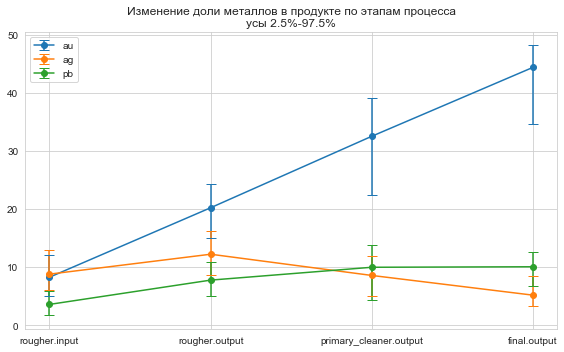

In [66]:
metals_by_stages_lineplot(df_full)

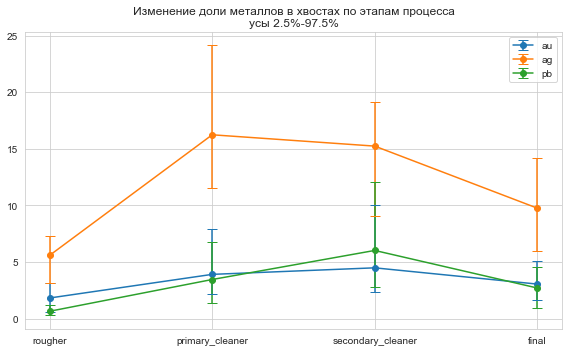

In [67]:
metals_by_stages_lineplot(df_full, tail=True)

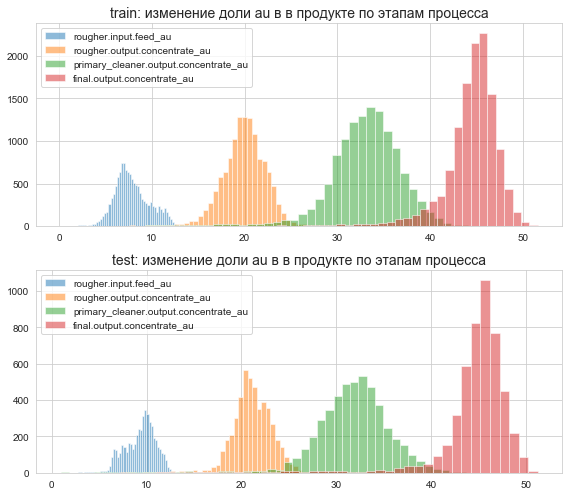

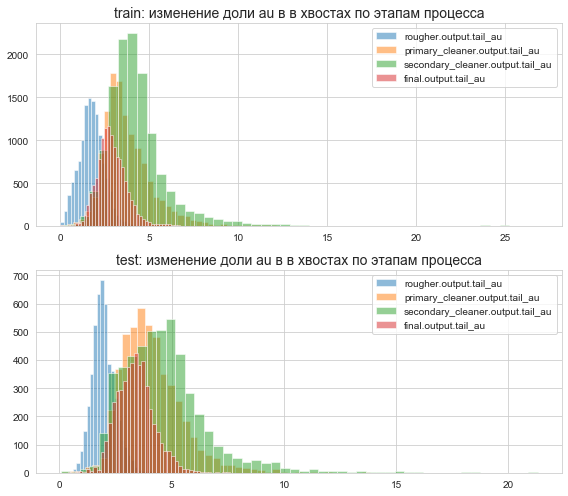

In [68]:
for tail_value in [False, True]:
    metal_by_stages_hists(df_full, 'au', tail=tail_value, train_test_split_=True, figsize=(8,7))

Проблемных значений после очистки стало меньше, хотя длинные хвосты остаются. Думаю, это уже не будет проблемой при обучении, т.к. объектов в хвостах немного. 

Видно, что доля золота в процессе обогащения устойчиво и линейно растёт. Возможно, себя хорошо покажет линейная регрессия. Незначительно растёт доля свинца. Доля серебра после очистки снижается. Интересно, что вид распределения доли золота в сырье в трейне и тесте отличается, но после флотации распределения уже схожи, пики не так сильно смещены друг относительно друга. 

Доля серебра в хвостах значительно выше, чем доли свинца и золота. Причём, как и преполагалось, у свинца и золота тенденции схожи (т.е. из-за их близости в таблице химических элементов они сложнее разделяются в процессе обогащения; серебро от них отделаяет лучше, чем они друг от друга). Не зря в данных есть коэффициент отношения свинца к золоту во входном сырье. Его нужно будет досчитать для объектов трейна и теста на основании принаков, доступных при работе модели.

In [69]:
#извлечение списка признаков, описывающих состояние и входные продукты процесса основной флотации
rougher_features_list = df_full.columns.str.extract('(rougher\.input\..+|rougher\.state\..+)').dropna()[0].values

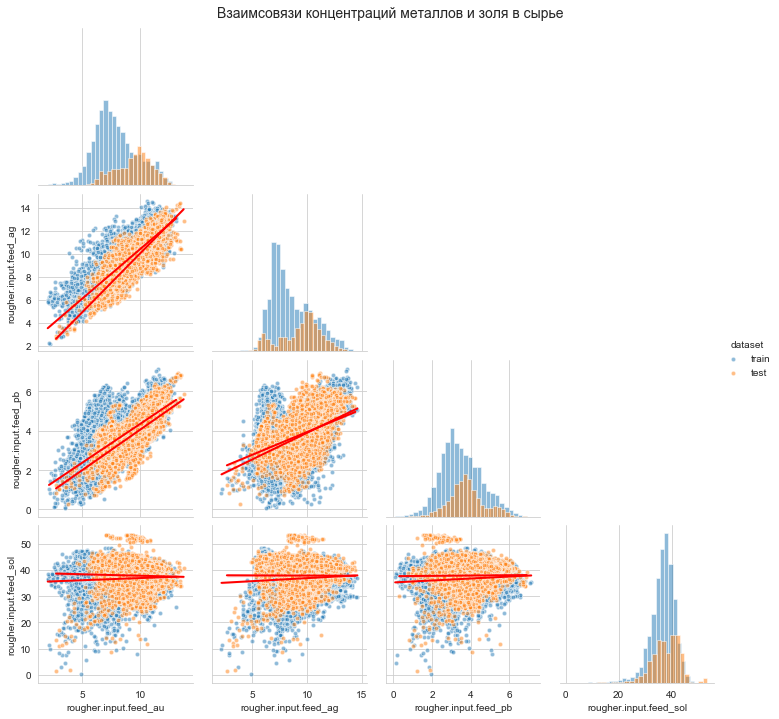

In [70]:
g = sns.pairplot(data = df_full,
                 vars = ['rougher.input.feed_au', 'rougher.input.feed_ag',
                         'rougher.input.feed_pb', 'rougher.input.feed_sol'],
                 corner=True, kind='reg', diag_kind='hist', hue='dataset',
                 plot_kws={'line_kws':line_kws, 'scatter_kws':scatter_kws}, 
                 diag_kws=dict(bins=30, alpha=0.5))

g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Взаимсовязи концентраций металлов и золя в сырье', size=14)
plt.show()

In [71]:
#извлечение списка признаков, описывающих состояние и входные продукты процесса основной флотации
rougher_features_list = df_full.columns.str.extract('(rougher\.input\..+|rougher\.state\..+)').dropna()[0].values
rougher_features_list

array(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'], dtype=object)

В целом мы имеем дело с полиметаллической рудой, в которой доли золота и серебра примерно равны, а свинца несколько меньше. Доля золя с долями металлов не связана и, видимо, определяется условиями измельчения породы. Зависимости для теста и трейна сходи, это хорошо, сырьё в надорах данных схожее.

In [72]:
#извлечение списка признаков, описывающих состояние и входные продукты процесса очистки
cleaner_features_list = list( set(df_dict['test'].columns.values) - set(rougher_features_list) ) + ['rougher.output.concentrate_au']
cleaner_features_list

['secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank5_b_level',
 'primary_cleaner.state.floatbank8_d_level',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.input.depressant',
 'secondary_cleaner.state.floatbank6_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'primary_cleaner.state.floatbank8_c_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.input.sulfate',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.float

Проанализирую взаимосвязи целевых признаков процессов флотации и очистки с предикторами. Нет ли явных зависимостей или чего-то аномального.

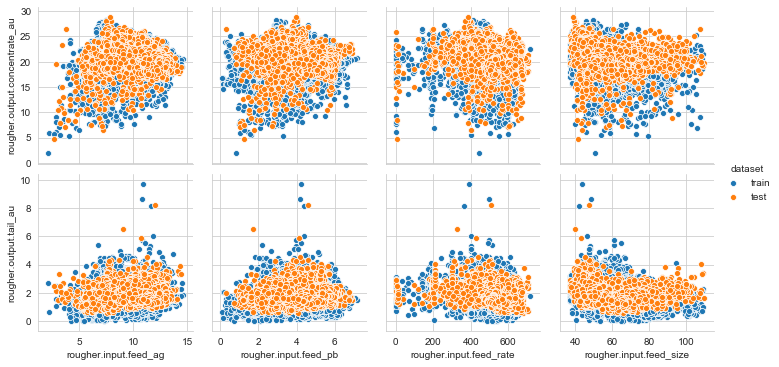

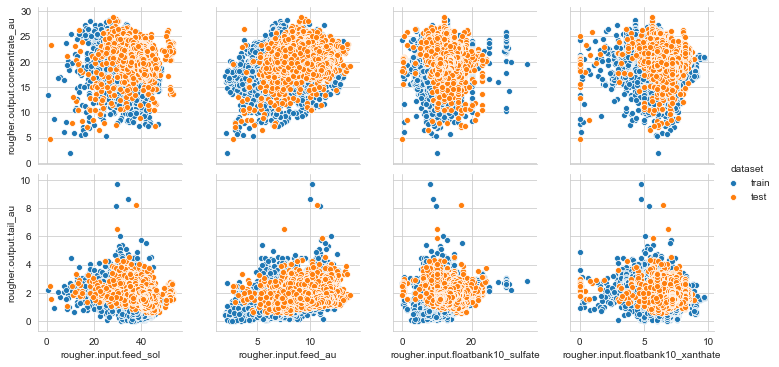

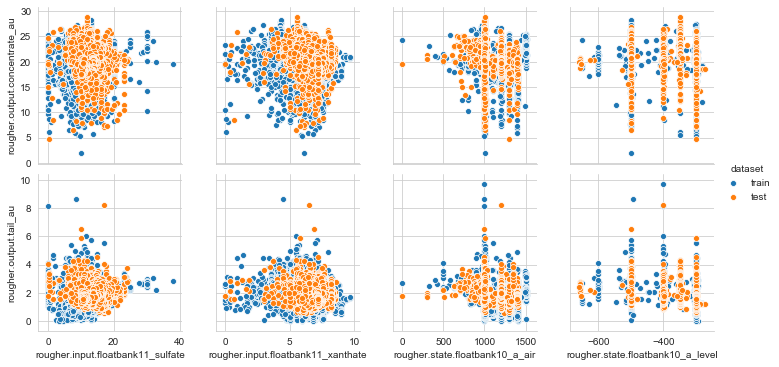

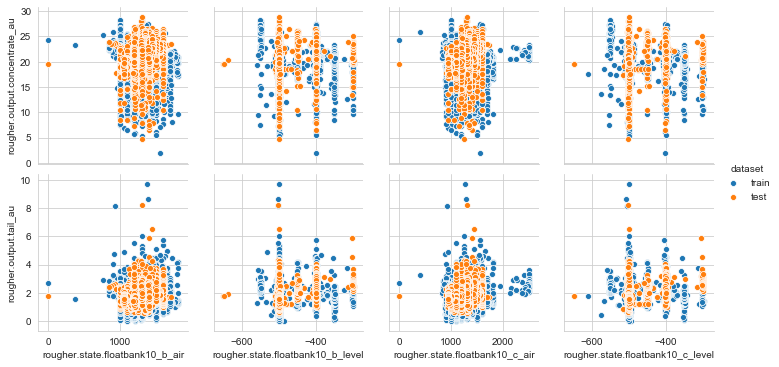

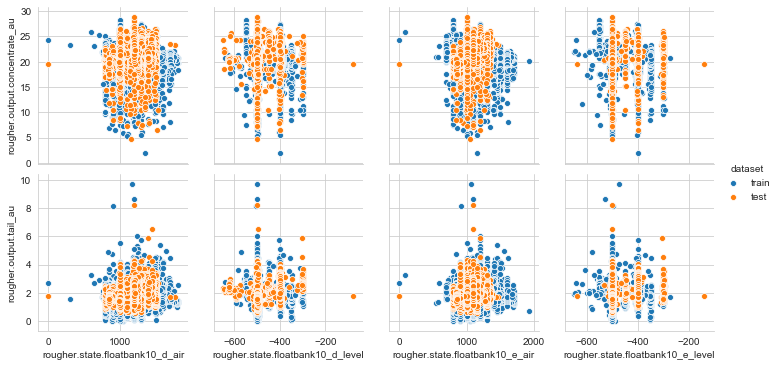

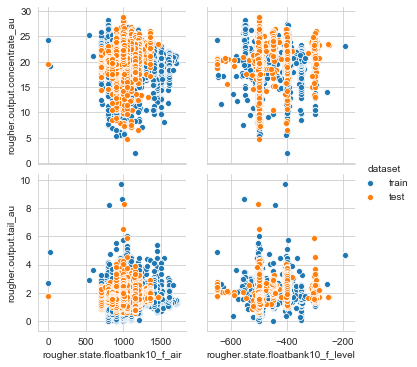

In [73]:
step = 4
for i in range(0, int(len(rougher_features_list)/step)+1):
    g = sns.pairplot(df_full, x_vars=rougher_features_list[i*step : (i+1)*step],
                     y_vars=['rougher.output.concentrate_au', 'rougher.output.tail_au'],
                     kind='scatter', hue='dataset')

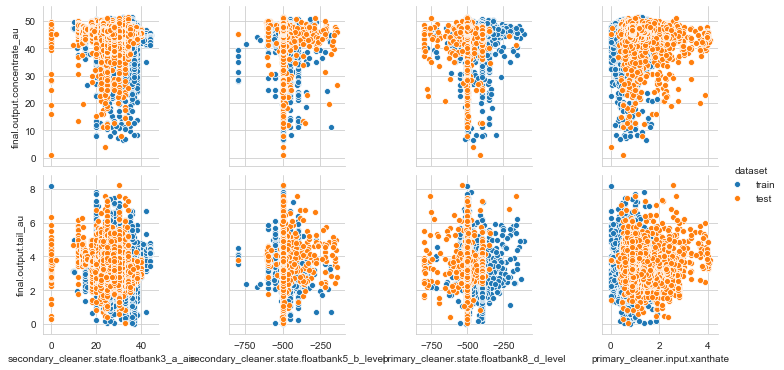

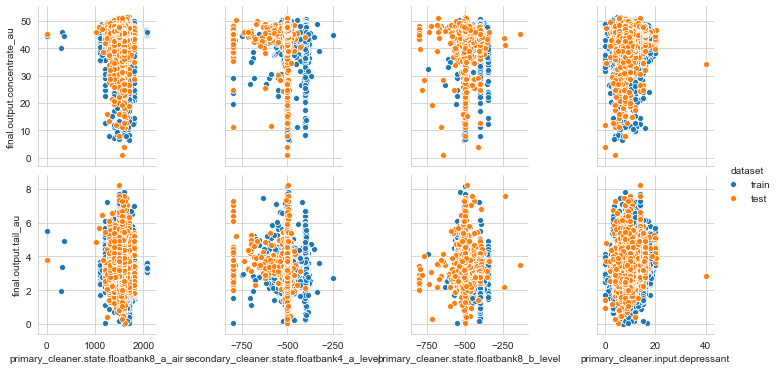

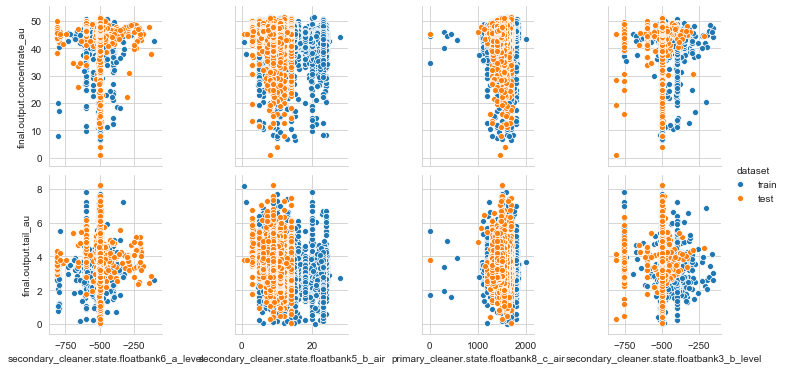

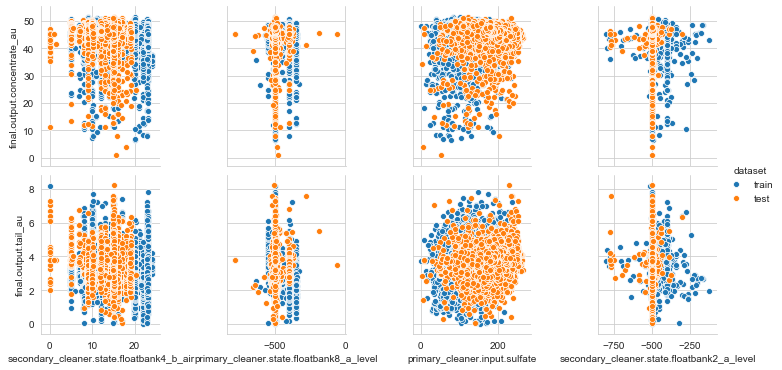

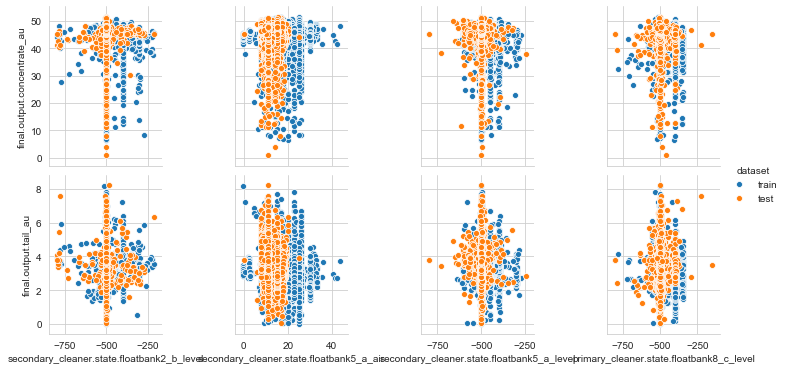

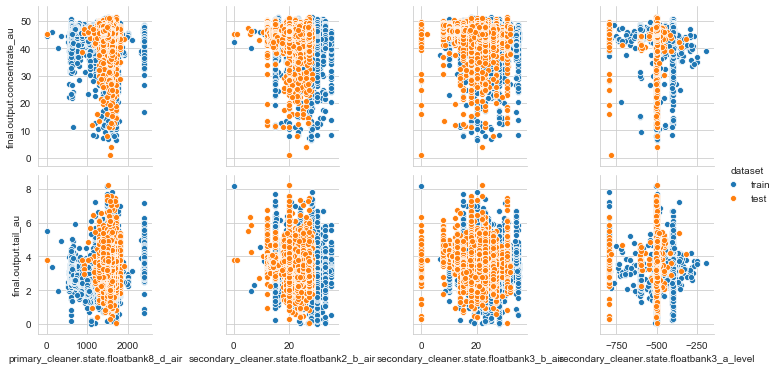

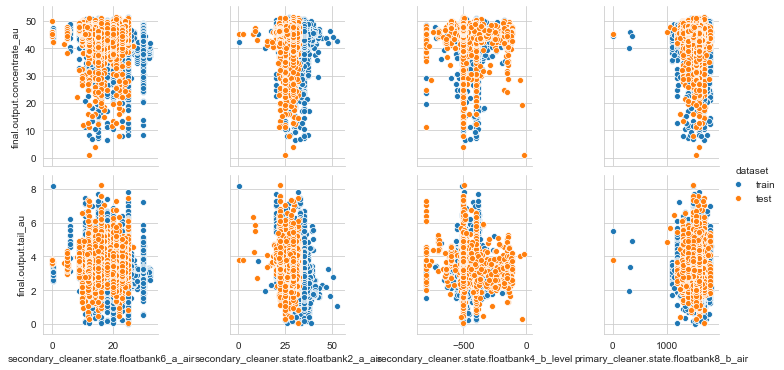

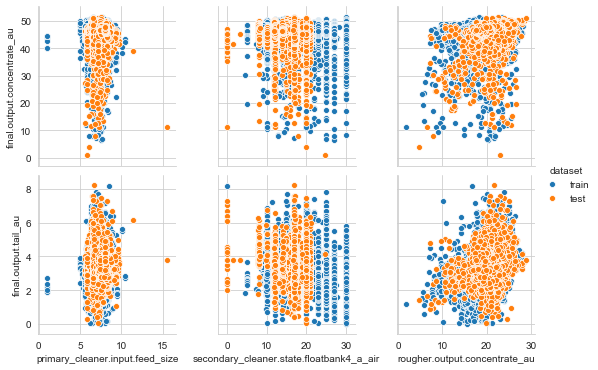

In [74]:
step = 4
for i in range(0, int(len(cleaner_features_list)/step)+1):
    g = sns.pairplot(df_full, x_vars=cleaner_features_list[i*step:(i+1)*step],
                     y_vars=['final.output.concentrate_au', 'final.output.tail_au'],
                     kind='scatter', hue='dataset')

В данных остались нули. Посмотрим, сколько их и в каких признаках.

In [75]:
zeros_s = df_full[abs(df_full[cleaner_features_list]) < 0.1].count().sort_values(ascending=False)

In [76]:
zeros_s.sum()

410

In [77]:
zeros_s

secondary_cleaner.state.floatbank3_b_air    125
secondary_cleaner.state.floatbank3_a_air    119
primary_cleaner.input.xanthate               90
secondary_cleaner.state.floatbank4_a_air     23
secondary_cleaner.state.floatbank4_b_air     23
                                           ... 
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
final.output.concentrate_ag                   0
Length: 84, dtype: int64

In [78]:
zeros_s[zeros_s>0].index

Index(['secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_a_air',
       'primary_cleaner.input.xanthate',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_b_air',
       'primary_cleaner.input.depressant',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_a_air',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_b_air'],
      dtype='object')

In [79]:
df_full.loc[abs(df_full.loc[:, 'secondary_cleaner.state.floatbank3_b_air']) < 0.1, 'secondary_cleaner.state.floatbank3_b_air']

date
2016-01-30 16:00:00    7.771140e-05
2016-07-06 10:59:59    6.137256e-22
2016-11-22 04:59:59    1.327089e-02
2016-11-22 05:59:59    1.138247e-02
2016-11-22 06:59:59    9.494048e-03
                           ...     
2016-11-27 17:59:59    1.521587e-17
2017-12-17 07:59:59    1.158437e-16
2017-12-17 09:59:59    1.158437e-16
2017-12-17 10:59:59    1.158437e-16
2017-12-27 10:59:59    3.130303e-10
Name: secondary_cleaner.state.floatbank3_b_air, Length: 125, dtype: float64

Явных зависимостей не видно. Некоторые параметры распределены как-то дискретно. Возможно, это норма. Есть нулевые значения. В основном они касаются воздуха (air), но, возможно, так и должно быть? Или, например, это сигналы от отключенных датчиков, т.е. значение неизвестно. Можно попробовать заполнить их nan, a затем воспользоватьcя алгоритмом заполнения пропусков. Попробую сделать это при подготовке пайплайнов моделей. 

Видно, что в тестовом датасете распределение объектов напонимает тренировочный датаст. В этом смысле всё корректно. Просматриваются зависимости доли золота в хвостах и концентратах от размера частиц, скорости подачи и количества флотационных реагентов. А также - от параметров флотационных машин. Но сделать однозначные выводы сложно, т.к. данных очень много.

При необходимости при построении моделей можно будет оценить (по весам коэффициентов или способности признаков снижать энтропию), какие из предикторов вносят больший вклад в целевой признак.

<h1 style="color:SteelBlue"> 4. Построение алгоритмов прогноза и машинное обучение</h1>

Повторю для удобства подходы к решению задачи, предложенные ранее.

- прогноз <code>final.output.recovery и rougher.output.recovery</code>: 
    - модель 1 для <code>rougher.output.recovery</code> 
    - модель 2 для <code>final.output.recovery</code>


- прогноз составляющих и последующий расчёт <code>final.output.recovery и rougher.output.recovery</code> без разделения этапов.  Всего 4 модели: 
    - модель 1 для <code>rougher.output.concentrate_au</code> 
    - модель 2 для <code>rougher.output.tail_au</code>
    - модель 3 для <code>final.output.concentrate_au</code>
    - модель 4 для <code>final.output.tail_au</code>

In [80]:
#готовлю обучающую и тестовую выборку предикторов
test_features_list = df_dict['test'].columns

df_train = df_full.loc[df_full['dataset'] == 'train', :]
df_test = df_full.loc[df_full['dataset'] == 'test', :]

X_train = df_train[test_features_list].copy()
X_test = df_test[test_features_list].copy()

#добавляю признаки
add_features(X_train)
add_features(X_test)

#для последующей оценки важности признаков получаю их список
train_features_list = X_train.columns

#готовлю целевые переменные
y_features_list = ['rougher.output.recovery', 
                   'final.output.recovery', 
                   'rougher.output.concentrate_au', 
                   'rougher.output.tail_au', 
                   'final.output.concentrate_au',
                   'final.output.tail_au']

y_train = df_train[y_features_list]
y_test = df_test[y_features_list]

<h2 style="color:DodgerBlue">4.1 Выбор метода разбиения данных на блоки для кросс-валидации</h2>

В наборе данных объекты распределены по времени. Нужно ли делать так, чтобы обучение шло на объектах, которые были по времени раньше, а валидация – на объектах, которые были по времени позже? Посмотрю, как распределены по времени данные тестового и тренировочного набора.

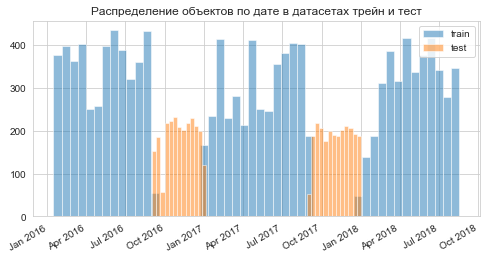

In [81]:
fig, ax = plt.subplots(figsize=(8,4))

for ds in ['train', 'test']:
    ax.hist(df_full.loc[df_full['dataset'] == ds].index, bins=50, alpha=0.5, label=ds)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()
ax.legend()
ax.set_title('Распределение объектов по дате в датасетах трейн и тест')
plt.show()

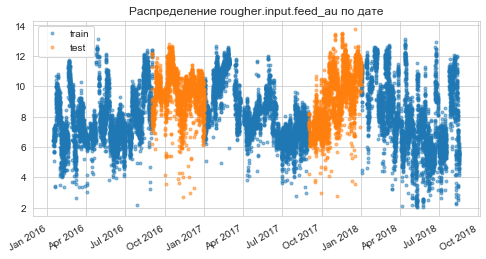

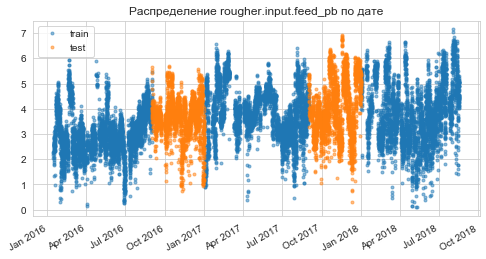

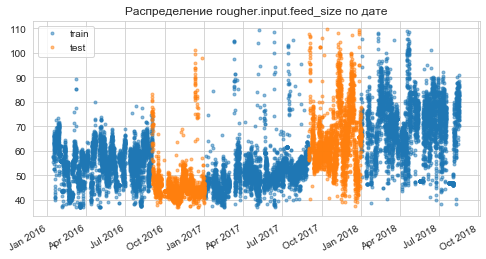

In [82]:
for feature in ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_size']:
    fig, ax = plt.subplots(figsize=(8,4))
    for ds in ['train', 'test']:
        plt.plot(df_full.loc[df_full['dataset'] == ds, feature], '.', alpha=0.5, label=ds)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
        fig.autofmt_xdate()
        ax.legend()
    ax.set_title(f'Распределение {feature} по дате')
    plt.show()

Размер частиц имеет тенденцию со временем расти. В составе руды явных тенденций, связанных с изменениями в зависимости от времени, не заметно. Видно, что характеристики во времени непостоянны и отдельным временным интервалам соответствуют свои интервалы распределения этих характеристик. 

На мой взгляд, cделать корректно валидацию по <code>TimeSeriesSplit</code> не получится, т.к. объекты теста взяты не из оконечного временного интервала. Надо учитывать, что модель будет принимать на вход блоки данных, полученные в рамках ограниченных непрерывных временных интервалов. Соответственно, и кросс-валидацию надо проводить на таких блоках. Размер каждого из блоков из теста соответствует примерно 1/6 трейна. Поэтому выглядит логичным при кросс-валидации разбить упорядоченные по времени данные трейна на 6 блоков, имитируя прогноз модели в реальных условиях на блоках данных, аналогичных тесту. Т.е. для кросс-валидации использовать <code>K-Folds cross-validator</code> с параметрами <code>n_splits=6, shuffle=False</code>

Проверю, как работает такое разбиение на блоки.

In [83]:
cross_validator = KFold(n_splits=6, shuffle=False, random_state=None)

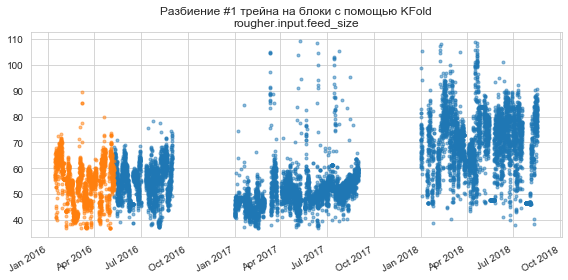

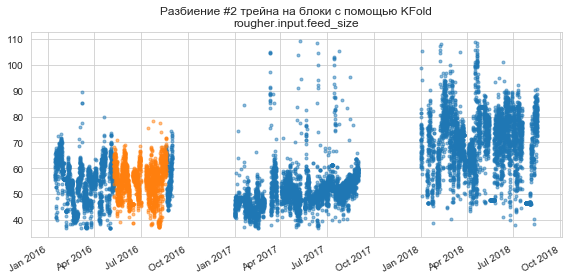

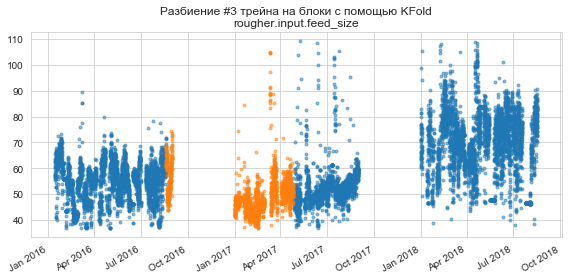

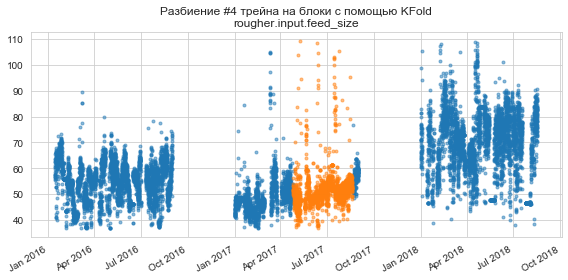

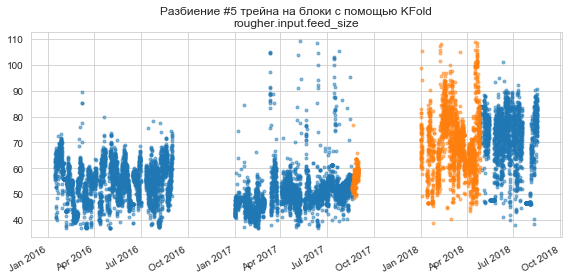

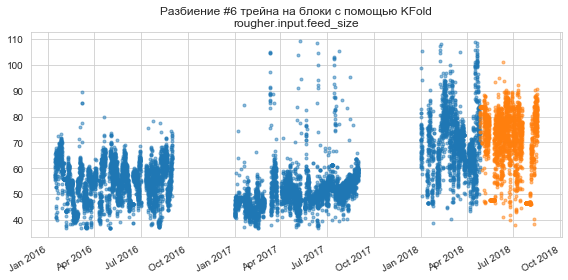

In [84]:
i = 0
for cv_train_index, cv_test_index in cross_validator.split(X_train):
    i+=1
    fig, ax = plt.subplots(figsize=(8,4))
    for indx in [cv_train_index, cv_test_index]:
        plt.plot(df_full.loc[X_train.index[indx], 'rougher.input.feed_size'], '.', alpha=0.5, label=indx)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
        ax.set_title(f'Разбиение #{i} трейна на блоки с помощью KFold\nrougher.input.feed_size')
        fig.autofmt_xdate()
        plt.tight_layout()

В третьем и пятом разбиениях зацеплено небольшое количество объектов из соседнего временного интервала. Думаю, это не критично, в целом разбиение выглядит корректным с точки зрения задачи и характера тестового набора данных.

<h2 style="color:DodgerBlue">4.2 Обучение моделей, подбор гиперпараметров, выбор лучшего подхода</h2>

Для удобства сразу создам пайплайн. В него включу предобработку: заполнение пропусков (чтобы алгоритм заполнения учился на тренировочной части и не было утечек данных) и стандартизацию. Признаки все количественные, кодировать ничего не нужно.

Попробую линейную регрессию с L1-регуляризацией (для исключения неинформативных признаков) и 2 алгоритма градиентного бустинга: xgboost и catboost.

Заполнение пропусков попробую <code>interpolate(method='time'), interpolate(method='time') и KNNImputer</code>, выберу лучший.

Для снижения размерности признакового пространства попробую использовать метод главных компонент или отбор по лассо-регрессии.

In [85]:
#функция заполнения пропусков
def fill_nan(df):
    #заполнение нулей крайне незначительно влияет на результат, но увеличивает время работы
#     for column in df.columns:
#         df.loc[abs(df.loc[:, column]) < 0.1, column] = np.nan 
    
    df = df.interpolate(method='time')
    #df = df.fillna(method='ffill') #interpolate показал себя лучше
    return df


#imputer = KNNImputer(n_neighbors=3, weights='uniform') #interpolate показал себя лучше
imputer = FunctionTransformer(fill_nan)
scaler = StandardScaler()
decomposer = PCA(n_components=30) #PCA не улучшил ситуацию

preprocessor = Pipeline(steps=[('imputer', imputer), ('scaler', scaler), ('decomposer', None)])

In [86]:
lasso_param_grid = {'model__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10]}
lasso_pipes_dict, lasso_best_params_dict = make_pipe_gridsearch(y_features_list, 
                                                                lasso_param_grid, 
                                                                preprocessor, 
                                                                model='lasso')

GridSearch for rougher.output.recovery done. {'model__alpha': 0.1}
GridSearch for final.output.recovery done. {'model__alpha': 0.4}
GridSearch for rougher.output.concentrate_au done. {'model__alpha': 0.05}
GridSearch for rougher.output.tail_au done. {'model__alpha': 0.01}
GridSearch for final.output.concentrate_au done. {'model__alpha': 0.05}
GridSearch for final.output.tail_au done. {'model__alpha': 0.05}


In [87]:
print('Lasso')
make_smape_cv_df(lasso_pipes_dict, X_train, y_train, stage_list=['rougher', 'final'], cv=cross_validator)

Lasso


cv1        cv2       cv3  \
direct.rougher.output.recovery_sMAPE       6.853223   7.391537  4.082648   
calculated.rougher.output.recovery_sMAPE   6.645127   7.353428  3.514789   
dummy.rougher.output.recovery_sMAPE        6.973878  10.375559  3.380440   
direct.final.output.recovery_sMAPE         9.737536   9.076363  6.504073   
calculated.final.output.recovery_sMAPE     9.377573   8.826770  6.017030   
dummy.final.output.recovery_sMAPE         11.193603  10.812433  9.671434   
calculated_total_sMAPE                     8.694462   8.458434  5.391470   
direct_total_sMAPE                         9.016458   8.655156  5.898716   
dummy_total_sMAPE                         10.138672  10.703214  8.098686   

                                                cv4        cv5        cv6  \
direct.rougher.output.recovery_sMAPE       5.444847   4.710353   6.624139   
calculated.rougher.output.recovery_sMAPE   5.512908   4.706119   6.451565   
dummy.rougher.output.recovery_sMAPE        5.775626   8.180687  15.673166   
direct.final.output.recovery_sMAPE         9.975416   8.137248   9.162245   
calculated.final.output.recovery_sMAPE     9.931292   7.866184  11.816484   
dummy.final.output.recovery_sMAPE         13.236702  11.929075  27.314399   
calculated_total_sMAPE                     8.826696   7.076168  10.475254   
direct_total_sMAPE                         8.842774   7.280524   8.527719   
dummy_total_sMAPE                         11.371433  10.991978  24.404091   

                                          mean_score  
direct.rougher.output.recovery_sMAPE        5.851125  
calculated.rougher.output.recovery_sMAPE    5.697323  
dummy.rougher.output.recovery_sMAPE         8.393226  
direct.final.output.recovery_sMAPE          8.765480  
calculated.final.output.recovery_sMAPE      8.972556  
dummy.final.output.recovery_sMAPE          14.026274  
calculated_total_sMAPE                      8.153747  
direct_total_sMAPE                          8.036891  
dummy_total_sMAPE                          12.618012

Между подходами <code>calculated</code> (прогноз составляющих и затем расчёт *recovery*) и <code>direct</code> (прямой прогноз *recovery*) по *sMAPE* разница небольшая. <code>rougher.output.recovery</code> - расчётная *sMAPE* чуть меньше, <code>final.output.recovery</code> - расчётная *sMAPE* чуть больше. Как следствие, *total_sMAPE* у прямого прогноза лучше.

Кроме того, прямой прогноз более стабилен, это видно по значению sMAPE, полученному в 6 валидации.

Учитывая, что для получения расчётных значений *recovery* нужно 4 модели, а для прямого прогноза - 2, использование прямого прогноза выглядит предпочтительнее.

В обоих случаях модели работают лучше, чем константная модель DummyRegressor.

Попробую обучить CatBoost и XGBoost. Начну с одинаковых (кроме глубины дерева) параметров для всех моделей, чтобы оценить, какой подход даcт лучший результат: <code>calculated</code> или <code>direct</code>. Глубину дерева больше 6 устанавливать не буду, чтобы избежать возникнования мнимых сложных взаимодействий. Данные, на мой взгляд, достаточно "шумные".

In [88]:
cb_param_grid = \
     {'model__max_depth': [3, 4, 5, 6],
      'model__n_estimators': [50],
      'model__eta': [0.1],
      'model__subsample': [0.8],
      'model__verbose': [False]
     }

cb_pipes_dict, cb_best_params_dict = \
make_pipe_gridsearch(y_features_list, cb_param_grid, preprocessor, model='catboost')

GridSearch for rougher.output.recovery done. {'model__eta': 0.1, 'model__max_depth': 5, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for final.output.recovery done. {'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for rougher.output.concentrate_au done. {'model__eta': 0.1, 'model__max_depth': 6, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for rougher.output.tail_au done. {'model__eta': 0.1, 'model__max_depth': 5, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for final.output.concentrate_au done. {'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for final.output.tail_au done. {'model__eta': 0.1, 'model__max_depth': 6, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}


In [89]:
print('CatBoostRegressor')
make_smape_cv_df(cb_pipes_dict, X_train, y_train, stage_list=['rougher', 'final'], cv=cross_validator)

CatBoostRegressor


cv1        cv2       cv3  \
direct.rougher.output.recovery_sMAPE       6.420346   7.132589  4.210066   
calculated.rougher.output.recovery_sMAPE   6.619828   6.657827  3.335034   
dummy.rougher.output.recovery_sMAPE        6.973878  10.375559  3.380440   
direct.final.output.recovery_sMAPE         9.165512   8.767638  6.339302   
calculated.final.output.recovery_sMAPE     9.832249  10.596826  6.060272   
dummy.final.output.recovery_sMAPE         11.193603  10.812433  9.671434   
calculated_total_sMAPE                     9.029144   9.612076  5.378962   
direct_total_sMAPE                         8.479220   8.358876  5.806993   
dummy_total_sMAPE                         10.138672  10.703214  8.098686   

                                                cv4        cv5        cv6  \
direct.rougher.output.recovery_sMAPE       5.495052   4.899261   5.662170   
calculated.rougher.output.recovery_sMAPE   5.216310   4.419419   8.116549   
dummy.rougher.output.recovery_sMAPE        5.775626   8.180687  15.673166   
direct.final.output.recovery_sMAPE         9.930401   8.099346   9.182999   
calculated.final.output.recovery_sMAPE    10.373814   7.224013  16.011604   
dummy.final.output.recovery_sMAPE         13.236702  11.929075  27.314399   
calculated_total_sMAPE                     9.084438   6.522864  14.037840   
direct_total_sMAPE                         8.821564   7.299324   8.302792   
dummy_total_sMAPE                         11.371433  10.991978  24.404091   

                                          mean_score  
direct.rougher.output.recovery_sMAPE        5.636581  
calculated.rougher.output.recovery_sMAPE    5.727495  
dummy.rougher.output.recovery_sMAPE         8.393226  
direct.final.output.recovery_sMAPE          8.580866  
calculated.final.output.recovery_sMAPE     10.016463  
dummy.final.output.recovery_sMAPE          14.026274  
calculated_total_sMAPE                      8.944221  
direct_total_sMAPE                          7.844795  
dummy_total_sMAPE                          12.618012

In [90]:
xgb_param_grid = \
     {'model__max_depth': [3, 4, 5, 6],
      'model__n_estimators': [50],
      'model__eta': [0.1],
      'model__subsample': [0.8],
     }

xgb_pipes_dict, xgb_best_params_dict = \
make_pipe_gridsearch(y_features_list, xgb_param_grid, preprocessor, model='xgboost')

GridSearch for rougher.output.recovery done. {'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for final.output.recovery done. {'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for rougher.output.concentrate_au done. {'model__eta': 0.1, 'model__max_depth': 4, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for rougher.output.tail_au done. {'model__eta': 0.1, 'model__max_depth': 4, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for final.output.concentrate_au done. {'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for final.output.tail_au done. {'model__eta': 0.1, 'model__max_depth': 6, 'model__n_estimators': 50, 'model__subsample': 0.8}


In [91]:
print('XGBRegressor')
make_smape_cv_df(xgb_pipes_dict, X_train, y_train, stage_list=['rougher', 'final'], cv=cross_validator)

XGBRegressor


cv1        cv2       cv3  \
direct.rougher.output.recovery_sMAPE       6.857919   7.036359  4.739859   
calculated.rougher.output.recovery_sMAPE   7.016292   7.089338  3.100097   
dummy.rougher.output.recovery_sMAPE        6.973878  10.375559  3.380440   
direct.final.output.recovery_sMAPE         9.733005   8.684862  7.017005   
calculated.final.output.recovery_sMAPE     9.922827   9.542516  6.717127   
dummy.final.output.recovery_sMAPE         11.193603  10.812433  9.671434   
calculated_total_sMAPE                     9.196194   8.929222  5.812869   
direct_total_sMAPE                         9.014233   8.272737  6.447718   
dummy_total_sMAPE                         10.138672  10.703214  8.098686   

                                                cv4        cv5        cv6  \
direct.rougher.output.recovery_sMAPE       4.933702   5.459945   5.865129   
calculated.rougher.output.recovery_sMAPE   4.623680   4.614753   7.725564   
dummy.rougher.output.recovery_sMAPE        5.775626   8.180687  15.673166   
direct.final.output.recovery_sMAPE         9.631257   9.116720  11.146412   
calculated.final.output.recovery_sMAPE    10.066957   7.323947  16.357080   
dummy.final.output.recovery_sMAPE         13.236702  11.929075  27.314399   
calculated_total_sMAPE                     8.706138   6.646649  14.199201   
direct_total_sMAPE                         8.456869   8.202526   9.826092   
dummy_total_sMAPE                         11.371433  10.991978  24.404091   

                                          mean_score  
direct.rougher.output.recovery_sMAPE        5.815486  
calculated.rougher.output.recovery_sMAPE    5.694954  
dummy.rougher.output.recovery_sMAPE         8.393226  
direct.final.output.recovery_sMAPE          9.221544  
calculated.final.output.recovery_sMAPE      9.988409  
dummy.final.output.recovery_sMAPE          14.026274  
calculated_total_sMAPE                      8.915045  
direct_total_sMAPE                          8.370029  
dummy_total_sMAPE                          12.618012

Попробую ещё XGBoost с <code>booster=gblinear</code>

In [92]:
xgb_linear_param_grid = {'model__booster':['gblinear'],
                         'model__alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 5]}

xgb_linear_pipes_dict, xgb_linear_best_params_dict = make_pipe_gridsearch(y_features_list, 
                                                            xgb_linear_param_grid, 
                                                            preprocessor, model='xgboost')

GridSearch for rougher.output.recovery done. {'model__alpha': 0.1, 'model__booster': 'gblinear'}
GridSearch for final.output.recovery done. {'model__alpha': 0.4, 'model__booster': 'gblinear'}
GridSearch for rougher.output.concentrate_au done. {'model__alpha': 0.05, 'model__booster': 'gblinear'}
GridSearch for rougher.output.tail_au done. {'model__alpha': 0.01, 'model__booster': 'gblinear'}
GridSearch for final.output.concentrate_au done. {'model__alpha': 0.05, 'model__booster': 'gblinear'}
GridSearch for final.output.tail_au done. {'model__alpha': 0.05, 'model__booster': 'gblinear'}


In [93]:
print('XGBRegressor booster=gblinear')
make_smape_cv_df(xgb_linear_pipes_dict, X_train, y_train, stage_list=['rougher', 'final'], cv=cross_validator)

XGBRegressor booster=gblinear


cv1        cv2       cv3  \
direct.rougher.output.recovery_sMAPE       6.849046   7.398685  4.082405   
calculated.rougher.output.recovery_sMAPE   6.642337   7.032654  3.662553   
dummy.rougher.output.recovery_sMAPE        6.973878  10.375559  3.380440   
direct.final.output.recovery_sMAPE         9.737226   9.076357  6.504023   
calculated.final.output.recovery_sMAPE     9.377513   9.732229  6.588151   
dummy.final.output.recovery_sMAPE         11.193603  10.812433  9.671434   
calculated_total_sMAPE                     8.693719   9.057335  5.856751   
direct_total_sMAPE                         9.015181   8.656939  5.898619   
dummy_total_sMAPE                         10.138672  10.703214  8.098686   

                                                cv4        cv5        cv6  \
direct.rougher.output.recovery_sMAPE       5.396049   4.702181   6.623048   
calculated.rougher.output.recovery_sMAPE   5.472274   5.788552   8.030946   
dummy.rougher.output.recovery_sMAPE        5.775626   8.180687  15.673166   
direct.final.output.recovery_sMAPE         9.975472   8.137350   9.162251   
calculated.final.output.recovery_sMAPE     9.712694   8.938506  15.178267   
dummy.final.output.recovery_sMAPE         13.236702  11.929075  27.314399   
calculated_total_sMAPE                     8.652589   8.151017  13.391437   
direct_total_sMAPE                         8.830616   7.278558   8.527450   
dummy_total_sMAPE                         11.371433  10.991978  24.404091   

                                          mean_score  
direct.rougher.output.recovery_sMAPE        5.841902  
calculated.rougher.output.recovery_sMAPE    6.104886  
dummy.rougher.output.recovery_sMAPE         8.393226  
direct.final.output.recovery_sMAPE          8.765446  
calculated.final.output.recovery_sMAPE      9.921227  
dummy.final.output.recovery_sMAPE          14.026274  
calculated_total_sMAPE                      8.967142  
direct_total_sMAPE                          8.034560  
dummy_total_sMAPE                          12.618012

Алгоритмы бустинга на решающих деревьях показывают, аналогично Lasso, что прямой <code>direct</code> прогноз более стабилен и даёт лучшее значение *sMAPE*.

Пока непонятно, какой алгоритм использовать. Для обоих вариантов бустинга нужно лучше настроить гиперпараметры, добавить регуляризацию. Пока Lasso несильно поигрывает CatBoost по direct_total_sMAPE, у XGBoost на решающих деревьях вообще выигрывает. XGBoost с booster=gblinear по direct примерно аналогичен Lasso, а по calculation проигрывает. При этом Lasso, как линейная модель, не склонна к переобучению и работает гораздо быстрее.

Попробую пройти по параметру регуляризации Lasso более мелким шагом, может быть получится ещё улучшить.

In [94]:
lasso_fine_param_grid = {'model__alpha': [i for i in np.arange(0.025, 0.5, 0.025)]}
lasso_pipes_dict, lasso_best_params_dict = \
make_pipe_gridsearch(test_musthave_features_list, lasso_param_grid, preprocessor, model='lasso')

GridSearch for final.output.recovery done. {'model__alpha': 0.4}
GridSearch for rougher.output.recovery done. {'model__alpha': 0.1}


In [95]:
lasso_score = {}
print('Lasso')
for key in test_musthave_features_list:  
    lasso_score[key] = \
    abs(cross_val_score(lasso_pipes_dict[key], X_train, y_train[key], cv=cross_validator, scoring=smape_scorer))
    print( key )
    print( lasso_score[key], lasso_score[key].mean() )

print('mean total_smape:', total_smape_calc(lasso_score['rougher.output.recovery'], 
                                       lasso_score['final.output.recovery']).mean() )

Lasso
final.output.recovery
[9.7375357  9.07636287 6.50407256 9.97541646 8.13724753 9.16224508] 8.765480033515262
rougher.output.recovery
[6.85322294 7.3915373  4.08264818 5.44484709 4.71035261 6.62413896] 5.851124513666702
mean total_smape: 8.036891153553123


Нет, в Lasso, похоже, достигнут предел.

In [96]:
xgn_fine_param_grid = {'model__eta': [0.1], 
                       'model__max_depth': [3], 
                       'model__n_estimators': [50,100], 
                       'model__subsample': [0.8],
                       'model__alpha': [0.5, 5]#рассматривал [0, 0.5, 1, 5, 10]
                      }

xgb_pipes_dict, xgb_best_params_dict = \
make_pipe_gridsearch(test_musthave_features_list, xgn_fine_param_grid, preprocessor, model='xgboost')

GridSearch for final.output.recovery done. {'model__alpha': 5, 'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8}
GridSearch for rougher.output.recovery done. {'model__alpha': 0.5, 'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}


In [97]:
xgb_score = {}
print('XGBoost')
for key in test_musthave_features_list:  
    xgb_score[key] = \
    abs(cross_val_score(xgb_pipes_dict[key], X_train, y_train[key], cv=cross_validator, scoring=smape_scorer))
    print( key )
    print( xgb_score[key], xgb_score[key].mean() )

print('mean total_smape:', total_smape_calc(xgb_score['rougher.output.recovery'], 
                                            xgb_score['final.output.recovery']).mean() )

XGBoost
final.output.recovery
[ 9.32154698  8.94124456  6.77084104  9.59755039  8.21857442 11.18275186] 9.005418208483912
rougher.output.recovery
[6.58185746 7.12237474 4.27674105 4.9547025  5.06011527 5.70218339] 5.616329065973223
mean total_smape: 8.15814592285624


XGBoost, похоже, проигрывает. Не вижу смысла дальше его пытаться настроить.

In [98]:
cb_fine_param_grid = {'model__eta': [0.1], 
                          'model__max_depth': [3, 5], 
                          'model__n_estimators': [50, 100],# ещё рассматривал вариант 200 
                          'model__subsample': [0.8],
                          'model__l2_leaf_reg': [0, 5], # рассматривал [0, 0.5, 1, 5, 10],
                          'model__verbose': [False]
                     }

cb_grid = {}

cb_pipes_dict, cb_best_params_dict = \
make_pipe_gridsearch(test_musthave_features_list, cb_fine_param_grid, preprocessor, model='catboost')

GridSearch for final.output.recovery done. {'model__eta': 0.1, 'model__l2_leaf_reg': 0, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 0.8, 'model__verbose': False}
GridSearch for rougher.output.recovery done. {'model__eta': 0.1, 'model__l2_leaf_reg': 5, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__subsample': 0.8, 'model__verbose': False}


In [99]:
cb_score = {}
print('CatBoost')
for key in test_musthave_features_list:  
    cb_score[key] = \
    abs(cross_val_score(cb_pipes_dict[key], X_train, y_train[key], cv=cross_validator, scoring=smape_scorer))
    print( key )
    print( cb_score[key], cb_score[key].mean() )

print('mean total_smape:', total_smape_calc(cb_score['rougher.output.recovery'], 
                                            cb_score['final.output.recovery']).mean() )

CatBoost
final.output.recovery
[9.00443503 8.92902274 6.40132957 9.88903709 7.91395019 9.26074568] 8.56642005009843
rougher.output.recovery
[6.53496762 6.87994659 4.24743104 5.6200736  4.92649543 5.48001649] 5.614821794861612
mean total_smape: 7.828520486289226


In [100]:
print('mean total_smape CatBoost:', total_smape_calc(cb_score['rougher.output.recovery'], 
                                                     cb_score['final.output.recovery']).mean() )

print('mean total_smape Lasso:', total_smape_calc(lasso_score['rougher.output.recovery'], 
                                                  lasso_score['final.output.recovery']).mean() )

mean total_smape CatBoost: 7.828520486289226
mean total_smape Lasso: 8.036891153553123


CatBoost показывает результат чуть лучше, чем Lasso, но немного, примерно на 2.5%. С учётом простоты и масштабируемости Lasso(), я бы предложил этот алгоритм. Тем не менее, проверим оба на тестовой выборке.

In [101]:
lasso_predict_test_dict = {}
lasso_smape_dict = {}
cb_predict_test_dict = {}
cb_smape_dict = {}

for key in test_musthave_features_list:
    cb_pipes_dict[key].fit(X_train, y_train[key])
    lasso_pipes_dict[key].fit(X_train, y_train[key])
    
    cb_predict_test_dict[key] =  cb_pipes_dict[key].predict(X_test)
    lasso_predict_test_dict[key] =  lasso_pipes_dict[key].predict(X_test)
    
    lasso_smape_dict[key] = smape_calc(lasso_predict_test_dict[key], y_test[key])
    cb_smape_dict[key] = smape_calc(cb_predict_test_dict[key], y_test[key])


cb_total_smape = total_smape_calc(cb_smape_dict['rougher.output.recovery'], 
                                  cb_smape_dict['final.output.recovery'])

lasso_total_smape = total_smape_calc(lasso_smape_dict['rougher.output.recovery'], 
                                     lasso_smape_dict['final.output.recovery'])

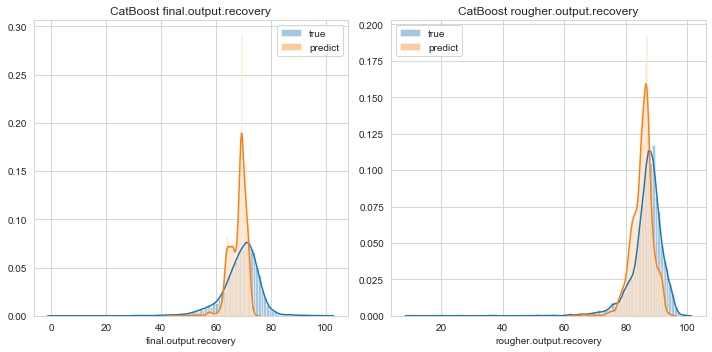

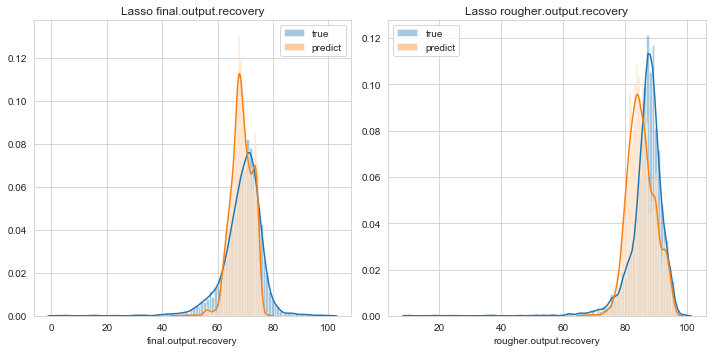

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for feature, ax in zip(test_musthave_features_list, axs):  
    sns.distplot(y_test[feature], bins=100, label='true', ax=ax)
    sns.distplot(cb_predict_test_dict[feature], bins=100, label='predict', ax=ax)
    ax.set_title(f'CatBoost {feature}')
    ax.legend()
    i += 1
plt.tight_layout()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for feature, ax in zip(test_musthave_features_list, axs):  
    sns.distplot(y_test[feature], bins=100, label='true', ax=ax)
    sns.distplot(lasso_predict_test_dict[feature], bins=100, label='predict', ax=ax)
    ax.set_title(f'Lasso {feature}')
    ax.legend()
    i += 1
plt.tight_layout()

In [103]:
print('TEST total_smape CatBoost:', cb_total_smape)

print('TEST total_smape Lasso:', lasso_total_smape)

TEST total_smape CatBoost: 6.446667172807984
TEST total_smape Lasso: 6.474915402701129


In [104]:
dummy_dict = {}
dummy_smape_dict = {}
for key in test_musthave_features_list:
    dummy_dict[key] = DummyRegressor(strategy='median').fit(X_train, y_train[key])
    dummy_smape_dict[key] = smape_calc(dummy_dict[key].predict(X_test), y_test[key])

dummy_total_smape = total_smape_calc(dummy_smape_dict['rougher.output.recovery'], 
                                     dummy_smape_dict['final.output.recovery'])
print('TEST total_smape dummy:', dummy_total_smape)

TEST total_smape dummy: 7.238536143016148


Метрика на тестовой выборке у обеих моделей практически совпадает. На мой взгляд, *Lasso* на гистограммах выглядит корректнее. Обе модели работают лучше константной модели. На мой взгляд, можно улучшить качество, выполнив feature engineering согласно деталям процесса обогащения. Для этого нужны дополнительные данные.

**Предлагаю остановиться на Lasso.**

In [105]:
lasso_pipes_dict

{'final.output.recovery': Pipeline(memory=None,
          steps=[('preprocessor',
                  Pipeline(memory=None,
                           steps=[('imputer',
                                   FunctionTransformer(accept_sparse=False,
                                                       check_inverse=True,
                                                       func=<function fill_nan at 0x000001D5AD2A7438>,
                                                       inv_kw_args=None,
                                                       inverse_func=None,
                                                       kw_args=None,
                                                       validate=False)),
                                  ('scaler',
                                   StandardScaler(copy=True, with_mean=True,
                                                  with_std=True)),
                                  ('decomposer', None)],
                           verbose=False)),

<h1 style="color:SteelBlue">Результаты построения и обучения моделей</h1>

Перед построением моделей выбрал метод разбиения данных на блоки для кросс-валидации. Характер разделения тестовой и тренировочной выборок (тестовая выборка - это 2 временных интервала примерно по 4 месяца), на мой взгляд, неплохо имитирует <code>K-Folds cross-validator</code> с параметрами <code>n_splits=6, shuffle=False</code>. 

Поскольку объекты, близкие друг к другу по времени, имеют схожие значения признаков, протестировал 3 метода заполнения пропусков: <code>interpolate(method='time'), interpolate(method='time') и KNNImputer</code>. Лучше всех результат получился с <code>interpolate(method='time')</code>

Построил и выполнил кросс-валидацию линейной модели с L1 регуляризацией (Lasso) и моделей на основе градиентного бустинга (XGBoostRegressor и CatBoostRegressor). Модели находятся в составе Pipeline, в котором также выполняется стандартизация и заполнение пропусков. При подборе гиперпараметров комбинировал ручную отладку с GridSearchCV. 

Рассмотрел два подхода: **прямой прогноз recovery** и **расчёт recovery на базе прогноза concentrate_au, tail_au.** Прямой прогноз оказался более стабильным и с меньшим значением sMAPE на кросс валидации. Для работы выбрал **прямой прогноз recovery**.

**Линейная модель Lasso()** превзошла XGBoostRegressor и не уступила CatBoostRegressor. Визуализация результатов прогнозирования, на мой взгляд, показывает корректную работу Lasso. На тестовой выборке получено значение <code>total_smape 6.475</code>.

<h1 style="color:SteelBlue">Общий вывод по работе</h1>

Цель работы - построить модели для прогноза эффективности восстановления золота из золотосодержащей руды. Работа несколько осложнена следующими факторами:
- нет полной информации о процессе восстановления золота, это мешает провести качественный feature engineering (выделить признаки, от которых зависит результат этапа и исключить на каждом из этапов лишнее)
- данные в определённой степени загрязнены пропусками и аномальными значениями
- характер взаимосвязей признаков со значением целевого признака достаточно запутанный, а процесс пенной флотации может быть чувствителен к незначительным изменениям как в составе сырья, так и в параметрах процесса. отследить скрытые взаимосвязи и спрогнозировать поведение модели достаточно сложно.


Исходные наборы данных представлены тремя датасетами. Содержат пропуски в целевых признаках, аномальные значения (много нулевых значений концентрации металлов, есть слишком большие и слишком маленькие размеры частиц и т.д.). Плохие данные появляются всплесками, причём очень резкими, сильно выбиваясь из общего уровня данных за аналогичные интервалы времени. Похоже на какие-то сбои или ошибки в базе. Меньше всего плохих данных приходится на октябрь-декабрь 2016 и 2017 годов. Самый сильный всплеск плохих данных - с января по март 2017 и 2018 годов.

Размеры наборов данных до и после очистки и процент вынужденных потерь:

In [106]:
lost_after_processing_calc(df_full, df_dict)

before  after  percent_lost
train   16860  12537          25.6
test     5856   4877          16.7

Проверил корректность данных: тестовый и тренировочный наборы данных - это практически точные (несоответствие на уровне 10^-12) копии срезов полного датасета (т.е. данные корректны), а значения recovery, содержащиеся в данных, соответствуют расчётным значениям. 

Выполнил попытку дополнить схему процесса обогащения золота, чтобы построить адекватные процессу модели. Опирался на названия признаков. Процесс стал прозрачнее, но всё равно остались "белые пятна".

Исследовательский анализ данных выявил линейный рост среднего значения доли золота в выходном концентрате от этапа к этапу. На диаграммах рассеяния также определяется влияние параметров процесса на данный признак. Доля серебра и свинца в выходном концентрате от этапа к этапу имеет тенденцию к снижению. Руда содержит золото, серебро и свинец, причём наблюдается тенденция линейной связи долей этих металло в сырье (т.е. состав руды в определённых пределах постоянный). В хвостах больше всего серебра, а вот свинца и золота примерно одинаково. Возможно, из-за сложностей при разделении данных металлов. Выделить какие-то явные взаимосвязи, кроме линейного роста доли золота в концентрате, на исследовательском этапе не удалось. В том числе из-за большого количества признаков.

При построении моделей машинного обучения рассмотрел два подхода к прогнозу: **прямой прогноз recovery** и **расчёт recovery на базе прогноза concentrate_au, tail_au.** Прямой прогноз оказался более стабильным и с меньшим значением sMAPE на кросс валидации. Для работы выбрал **прямой прогноз recovery**.

В рамках машинного обучения рассмотрел несколько наборов моделей: <code>Lasso, XGBoostRegressor, CatBoostRegressor.</code> Использовал стандартизацию <code>StandardScaler</code> и заполнение пропусков <code>interpolate(method='time')</code>. Все эти этапы оформил как <code>Pipeline</code>. При подборе гиперпараметров пользовался кросс-валидацией и поиском по сетке, в качестве метрик использовал собственные функции расчёта sMAPE.

**Линейная модель Lasso()** превзошла XGBoostRegressor и не уступила CatBoostRegressor. Визуализация результатов прогноза также показала корректность работы Lasso. На тестовой выборке получено значение <code>total_smape 6.475</code>. На константной модели - <code>7.238</code>. На мой взгляд, можно улучшить качество, выполнив feature engineering согласно деталям процесса обогащения. Для этого нужны дополнительные данные.

Итоговые модели прогноза эффективности восстановления золота из золотосодержащей руды:

In [107]:
display(lasso_pipes_dict)
print('TEST total_smape Lasso:', lasso_total_smape)
print('TEST total_smape dummy:', dummy_total_smape)

{'final.output.recovery': Pipeline(memory=None,
          steps=[('preprocessor',
                  Pipeline(memory=None,
                           steps=[('imputer',
                                   FunctionTransformer(accept_sparse=False,
                                                       check_inverse=True,
                                                       func=<function fill_nan at 0x000001D5AD2A7438>,
                                                       inv_kw_args=None,
                                                       inverse_func=None,
                                                       kw_args=None,
                                                       validate=False)),
                                  ('scaler',
                                   StandardScaler(copy=True, with_mean=True,
                                                  with_std=True)),
                                  ('decomposer', None)],
                           verbose=False)),

TEST total_smape Lasso: 6.474915402701129
TEST total_smape dummy: 7.238536143016148
